
# GRUPO Nº 8


📝 Integrantes:

   1. Acosta, Carla
   2. Barrera, Cristian
   3. Chuchuca, Fanny
   4. Colmenares, Carlos
   5. González, Yanina
   6. Laya, Nicolás
   7. Olave Portilla, Nicolás
   8. Relañez, Alejandro
   9. Parra, Agustín
   10. Pintos, Iván

In [1]:
#import de módulos necesarios a utilizar
import pandas as pd
import re
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_location = "properatti.csv"
data = pd.read_csv(data_location)

Para comenzar, hacemos un análisis general de la base a trabajar. Miramos la cantidad de registros y de variables, y seleccionamos una muestra aleatoria para analizar el contenido:

In [3]:
print(data.shape)
data.sample(10)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
9145,9145,sell,store,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,NaN,NaN,...,144.0,3020.833333,3020.833333,NaN,NaN,NaN,http://www.properati.com.ar/1632g_venta_local_...,!!!ÃNICO EN SU TIPO!!!ZONA: Pleno centro de Sa...,"Local 144m² con Teléfono en Martin Y Omar 100,...",https://thumbs4.properati.com/7/sy1ueCsoaTA0-v...
95624,95624,sell,apartment,Haedo,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Haedo|,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,NaN,NaN,...,35.0,2567.567568,2714.285714,NaN,NaN,NaN,http://www.properati.com.ar/1bhfh_venta_depart...,Excelente Edificio Moderno de 5 pisos a estren...,Remedios de Escalada 47 - Haedo,https://thumbs4.properati.com/7/PvfEO5GJj91svA...
103258,103258,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6555354397,-58.4946311411",-34.655535,...,NaN,2166.666667,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1broy_venta_depart...,Venta departamento de 2 ambientes casi nuevo e...,Departamento - Mataderos,https://thumbs4.properati.com/6/NeDEIVZJXhdj5V...
74737,74737,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.5946892803,-58.3959620116",-34.594689,...,126.0,2492.647059,2690.476190,NaN,NaN,6000.0,http://www.properati.com.ar/1apdl_venta_depart...,Excelente ubicación en pleno Recoleta a metros...,Ayacucho 1200 - Recoleta,https://thumbs4.properati.com/1/0GKD17zV8Ml-rH...
83888,83888,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1b12n_venta_depart...,"Departamento muy lindo y luminoso, ubicado a d...",Departamento a estrenar- Centro de Tigre,https://thumbs4.properati.com/1/9mEq0QXr4CP4Xl...
12673,12673,sell,apartment,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,3436134.0,"-34.64983,-58.38185",-34.649830,...,120.0,1400.000000,1400.000000,NaN,4.0,NaN,http://www.properati.com.ar/16mld_venta_depart...,1er piso por escalera con entrada independient...,PH 4 ambientes,https://thumbs4.properati.com/5/VQwv1IWDjbEe9K...
115157,115157,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.358268,-64.202346",-31.358268,...,380.0,NaN,578.947368,NaN,27.0,NaN,http://www.properati.com.ar/1casx_venta_casa_c...,PROPIEDAD COMPUESTA POR 2 TERRENOS EN ESQUINA....,MARQUEZ 3 DORM 4 BAÑ ESC PILETA COCH,https://thumbs4.properati.com/8/G-Z8_xSug8bdRw...
11842,11842,sell,apartment,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Argentina,Buenos Aires Costa Atlántica,3429971.0,"-37.1173113,-56.8568357",-37.117311,...,NaN,NaN,NaN,1.0,2.0,NaN,http://www.properati.com.ar/16h1d_venta_depart...,Venta departamento en Pinamar!a solo 50mts de ...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/3/RTqqDagg29-IJS...
44813,44813,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,"-34.613199,-58.44123",-34.613199,...,NaN,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/19194_venta_depart...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Caballito,https://thumbs4.properati.com/3/DUJ3No6MJmVyvU...
26859,26859,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Argentina,Bs.As. G.B.A. Zona Norte,3427467.0,"-34.5481554,-58.5368005",-34.548155,...,120.0,491.735537,991.666667,NaN,5.0,NaN,http://www.properati.com.ar/17rlz_venta_casa_v...,CASA EN LOTE PROPIO GARAJE EQUIPADO PARA CAMIO...,CASA EN LOTE PROPIO EXCELENTE ESTADO,https://thumbs4.properati.com/8/O3uub-BLVORL_i...


In [4]:
data.operation.value_counts()

sell    121220
Name: operation, dtype: int64

Analizamos el tipo de datos de cada columna e información sobre la distribución de los datos:

In [5]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [6]:
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


Por último, analizamos la cantidad y el porcentaje de valores nulos por columna.

In [7]:
print("Cantidad de nulos por columna:")
print(data.isnull().sum())
print("----------------------------------")
print("Porcentaje de nulos por columna:")
((data.isnull().sum()/data.shape[0]*100).round(2)).sort_values()

Cantidad de nulos por columna:
Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: 

Unnamed: 0                     0.00
operation                      0.00
property_type                  0.00
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
description                    0.00
properati_url                  0.00
title                          0.00
place_name                     0.02
image_thumbnail                2.57
geonames_id                   15.44
surface_covered_in_m2         16.42
price                         16.84
price_aprox_local_currency    16.84
price_aprox_usd               16.84
currency                      16.84
price_per_m2                  27.69
surface_total_in_m2           32.44
lat                           42.53
lat-lon                       42.53
lon                           42.53
price_usd_per_m2              43.39
rooms                         60.91
expenses                      88.23
floor                         93.48
dtype: float64

#### CONCLUSIONES PRELIMINARES 📌

Tenemos un dataset con 121220 registros y 26 variables.

De las 26 variables:
    
   * 10 variables no contienen nulos
   * 7 variables tienen menos del 20% de nulos
   * 6 variables contienen entre 20% y 50% de nulos
   * 3 variables contienen más de 50% de nulos (dos de ellas por encima del 85%)
    
Luego de este primer análisis, decidimos prescindir de columnas que no tienen valor para el futuro modelo de predicción. Serán eliminadas posteriormente a la hora de definir el dataset final. 

   * *Unnamed: 0*: su valor es idéntico al del index. 
   * *Operation*: su único valor es "sell", por lo que todos los registros refieren a ventas de una propiedad.
   * *place_with_parent_names*: su función es concatenar valores de *country_name, *place_name* y *state_name*. Por lo tanto esa información esta presentre en otras columnas y en un formato más útil para trabajar.
   * *country_name*: su único valor es Argentina, por lo que podemos trabajar bajo el supuesto de que todas las ventas ocurrieron en ese país.
   * *properati_url*: no contiene información relevante.
   * *image_thumbnail*: no contiene información relevante.
   * *expenses*: contiene un porcentaje muy alto de nulos. 
   
      
Con las variables restantes, de acuerdo a la información que contienen, decidimos agruparlas en "secciones" para trabajarlas mejor: 

1. Columnas relativas a la ubicación geográfica de la propiedad
2. Columnas con información descriptiva sobre la propiedad
3. Columnas referidas al valor de la propiedad.
    


## SECCIÓN 1 - COLUMNAS GEOGRÁFICAS
----------------

1. place_name
2. geonames_id
3. lat
4. lon
5. lat-lon


Armamos un df reducido las columnas de interés para esta sección.

In [8]:
data_geo = data[["geonames_id","lat","lon","lat-lon"]]
data_geo.head(5)

,geonames_id,lat,lon,lat-lon
0,3430787.0,-34.661824,-58.508839,"-34.6618237,-58.5088387"
1,3432039.0,-34.903883,-57.964330,"-34.9038831,-57.9643295"
2,3430787.0,-34.652262,-58.522982,"-34.6522615,-58.5229825"
3,3431333.0,-34.647797,-58.516424,"-34.6477969,-58.5164244"
4,3435548.0,-38.002626,-57.549447,"-38.0026256,-57.5494468"


**Tipos de las columnas**. Hay 3 en formato numérico, y 1 de tipo *object*, que combina los datos de latitud y longitud.

In [9]:
print(data_geo.dtypes)
print(data_geo.shape)

geonames_id    float64
lat            float64
lon            float64
lat-lon         object
dtype: object
(121220, 4)


**Porcentaje de nulos**.
La columna *geonames_id* tiene un % sensiblemente menor de nulos que las otras 3 columnas. 
Las columnas *lat-lon*, *lat* y *lon*, además de tener un % alto (42,5), tienen la misma cantidad de nulos.

In [10]:
print("Cantidad de nulos por columna:")
print(data_geo.isnull().sum())
print("------------------------")
print("Porcentaje de nulos por columna:")
porc_nulos = (data_geo.isnull().sum() / data_geo.shape[0] *100).round(2)
porc_nulos.sort_values(ascending=False)

Cantidad de nulos por columna:
geonames_id    18717
lat            51550
lon            51550
lat-lon        51550
dtype: int64
------------------------
Porcentaje de nulos por columna:


lat-lon        42.53
lon            42.53
lat            42.53
geonames_id    15.44
dtype: float64

---

#### SECCION 1.1 - LAT, LON, LAT-LON


 #### ANÁLISIS 🔎


Presumiblemente, los nulos corresponden a las mismas filas y por lo tanto no podemos recuperar información entre ellas.


Para comprobar esto, creamos un nuevo df con los nulos en la variable "lat", que contiene las 3 columnas de interés.

In [11]:
mask_lat_null = data_geo["lat"].isnull()
lat_null = data_geo.loc[mask_lat_null,["lat","lon","lat-lon"]]
lat_null

,lat,lon,lat-lon
13,NaN,NaN,NaN
14,NaN,NaN,NaN
23,NaN,NaN,NaN
42,NaN,NaN,NaN
49,NaN,NaN,NaN
...,...,...,...
121214,NaN,NaN,NaN
121215,NaN,NaN,NaN
121216,NaN,NaN,NaN
121218,NaN,NaN,NaN


Luego miramos la cantidad de nulos de ese df, pero sobre el axis 1, es decir, las filas. 
Al contar los valores, vemos que para todas las filas (51550) nos devuelve 3 nulos por fila. Por lo tanto, todos los nulos en *lat* son también nulos en *lon* y en *lat-lon*:

In [12]:
cant_nulos_xfila = lat_null.isnull().sum(axis=1)
print(cant_nulos_xfila.value_counts())

3    51550
dtype: int64


Otra manera de comprobar esto es utilizando el método .equals para comparar las series.

In [13]:
print("¿'lat' y 'lon' son iguales?", lat_null["lat"].equals(lat_null["lon"])) #en .equals, los nulos ubicados en la misma posición son considerados iguales. 

¿'lat' y 'lon' son iguales? True


In [14]:
lat_null["lat_object"] = lat_null["lat"].astype("object") #creamos una nueva col "lat_object" ccambiendole el tipo a "lat" para poder aplicar la comparación con "lat-lon"
print("¿'lat' y 'lat-lon' son iguales?", lat_null["lat_object"].equals(lat_null["lat-lon"]))

¿'lat' y 'lat-lon' son iguales? True


✔️ Demostramos que las 3 columnas son iguales entre sí. 

In [15]:
#data.description.to_csv("description_original")
#data.title.to_csv("title_original")

#### CONCLUSIÓN 📌
Si bien podrían recuperarse algunos valores (101) aplicando expresiones regulares en la columna *description*, consideramos que la ubicación geográfica exacta del inmueble (valores de latitud y longitud) es un dato muy específico que **no es determinante a la hora de predecir el precio por m2**.

Tampoco parece tener sentido intentar alguna estrategia de imputación: no podemos utilizar ninguna medida de tendencia de las columnas porque no serían representativas del punto geográfico, ni tampoco podemos asociar la info de latitud y longitud a la información contenida en otras variables.

Por otra parte, la variable precio suele responder a datos más generales como barrio o localidad. Por lo tanto las columnas "geoname_id" o "place_name"
pueden ser mas útiles.

---

#### SECCIÓN 1. 2 - GEONAMES_ID, PLACE_NAME

 #### ANÁLISIS 🔎

Queremos analizar a qué variable/s o criterio geográfico responde la columna *geonames_id*.


Creamos un nuevo df agregando otras variables que nos pueden servir para ello, y como como primer paso, analizamos si hay IDs que se repiten. En efecto algunos aparecen con mas frecuencia que otros:

In [16]:
data_geonames = data.loc[:,["geonames_id","place_name","state_name","country_name","place_with_parent_names","lat","lon","lat-lon"]]

In [17]:
ocurrencia_ids = data_geonames.geonames_id.value_counts().sort_values(ascending=False)
print("Ocurrencia de IDS (sin nulos):")
print(ocurrencia_ids)

Ocurrencia de IDS (sin nulos):
3838574.0    8504
3860259.0    6606
3430863.0    6534
3430234.0    3279
3436077.0    2992
             ... 
3832679.0       1
3834251.0       1
3436309.0       1
3436205.0       1
3860197.0       1
Name: geonames_id, Length: 646, dtype: int64


Haciendo un .head() sobre el df nuevo, podemos intuir que *geonames_id* es un valor único asociado a la localidad, dado que observaciones que tienen un mismo *state_name* y *country_name* pero diferente *place_name* (y por lo tanto diferente *place_with_parent_names*) tienen distintos valores para *geonames_id*. 
Ej: "Mataderos" vs "Liniers"

In [18]:
data_geonames.head(5)

,geonames_id,place_name,state_name,country_name,place_with_parent_names,lat,lon,lat-lon
0,3430787.0,Mataderos,Capital Federal,Argentina,|Argentina|Capital Federal|Mataderos|,-34.661824,-58.508839,"-34.6618237,-58.5088387"
1,3432039.0,La Plata,Bs.As. G.B.A. Zona Sur,Argentina,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,-34.903883,-57.964330,"-34.9038831,-57.9643295"
2,3430787.0,Mataderos,Capital Federal,Argentina,|Argentina|Capital Federal|Mataderos|,-34.652262,-58.522982,"-34.6522615,-58.5229825"
3,3431333.0,Liniers,Capital Federal,Argentina,|Argentina|Capital Federal|Liniers|,-34.647797,-58.516424,"-34.6477969,-58.5164244"
4,3435548.0,Centro,Buenos Aires Costa Atlántica,Argentina,|Argentina|Buenos Aires Costa Atlántica|Mar de...,-38.002626,-57.549447,"-38.0026256,-57.5494468"


A continuación contamos los valores únicos de cada columna (quitando los nulos), para ver si hay correspondencia.

In [19]:
mask_geo_id_not_null = data_geonames["geonames_id"].notnull()
geo_id_not_null = data_geonames.geonames_id[mask_geo_id_not_null] 

mask_place_name_not_null = data_geonames["place_name"].notnull()
place_name_not_null = data_geonames.place_name[mask_place_name_not_null]

mask_pwpn_not_null = data_geonames["place_with_parent_names"].notnull()
pwpn_not_null = data_geonames.place_with_parent_names[mask_pwpn_not_null]

In [20]:
print("Cantidad de valores únicos en geonames_id:", len(geo_id_not_null.unique()))
print("Cantidad de valores únicos en place_name:", len(place_name_not_null.unique()))
print("Cantidad de valores únicos en place_with_parent_names:", len(pwpn_not_null.unique()))

Cantidad de valores únicos en geonames_id: 646
Cantidad de valores únicos en place_name: 1060
Cantidad de valores únicos en place_with_parent_names: 1164



Vemos que hay mayor cantidad de valores unicos de *place_with_parent_names* y de *place_name*, que de *geonames_id*. Esto puede deberse a que hay  mayor cantidad de nulos en esa columna con respecto a las otras dos. **Pero también puede suceder que haya geo id's que estén asociados a más de una localidad, lo que sería un error de la base.**

Para comprobar esto hacemos una agrupación por ID, y contamos cuantos valores únicos de *place_name* hay para cada uno. 
Luego, aplicando una máscara, vemos que hay solo 5 ids que tienen más de un valor asociado. 

In [21]:
#lo vamos a hacer sobre valores no nulos de geonames_ID.
mask_geoid_notnull = data_geonames["geonames_id"].notnull()
data_geonames_notnull = data_geonames.loc[mask_geoid_notnull]
data_geonames_notnull.shape

(102503, 8)

In [22]:
place_name_by_id = data_geonames_notnull.groupby(["geonames_id"])["place_name"].nunique().sort_values(ascending = False)
place_name_by_id
mask_place_name_by_id = place_name_by_id > 1
id_multi_place_name = place_name_by_id[mask_place_name_by_id]
print(id_multi_place_name)
print("Cantidad geo ids con más de una localidad: ", len(place_name_by_id[mask_place_name_by_id]))

geonames_id
3435907.0    5
3428927.0    2
3430234.0    2
3435548.0    2
3433359.0    2
Name: place_name, dtype: int64
Cantidad geo ids con más de una localidad:  5


In [23]:
indices = id_multi_place_name.index #nos quedamos con los índices para crear una máscara
mask_indices = data_geonames_notnull["geonames_id"].isin(indices)
data_geonames_multi_localidad = data_geonames_notnull.loc[mask_indices]

Con un groupby listamos los valores que tiene cada uno de estos 5 geo id para *place_name*, pero junto a los valores de *state_name* para tener mayor información sobre la localidad. 

Para ver los valores que agrupa cada ID, agregamos el método .agg, que nos lista cada uno de los valores posibles para cada variable

In [24]:
place_name_by_id_values = data_geonames_multi_localidad.groupby("geonames_id").agg({'place_name': 'unique', 'state_name': 'unique'}).reset_index()
place_name_by_id_values

,geonames_id,place_name,state_name
0,3428927.0,"[San José, San Jose]",[Bs.As. G.B.A. Zona Sur]
1,3430234.0,"[Palermo Soho, Palermo]",[Capital Federal]
2,3433359.0,"[Ituzaingó, Villa Udaondo]",[Bs.As. G.B.A. Zona Oeste]
3,3435548.0,"[Centro, Centro / Microcentro]","[Buenos Aires Costa Atlántica, Capital Federal]"
4,3435907.0,"[Bs.As. G.B.A. Zona Sur, Buenos Aires Interior...","[Bs.As. G.B.A. Zona Sur, Buenos Aires Interior..."


En la salida anterior podemos ver que vemos que solamente los ultimos dos casos refieren a localidades distintas, ya que se encuentran en diferentes regiones.

#### CONCLUSIÓN 📌 

Asumimos que estos casos son errores y que **cada localidad debería tener un *geoname_id* unico.**

#### LIMPIEZA DE DATOS 📝

Procedemos a limpiar los primeros 3 casos, dejando solo un valor de circunscripción:

* **Para eso, creamos una nueva variable *place_name_new***

In [25]:
data["place_name_new"] = data["place_name"]
data["place_name_new"] = data["place_name_new"].replace("San Jose", "San José")
data["place_name_new"] = data["place_name_new"].replace("Palermo Soho", "Palermo")
data["place_name_new"] = data["place_name_new"].replace("Villa Udaondo", "Ituzaingó")

Miramos los otros dos casos:

In [26]:
#buenos aires
mask_3435907 = data["geonames_id"] == 3435907.0
data_3435907 = data.loc[mask_3435907,["geonames_id","place_name","place_with_parent_names","state_name","title","description","lat"]]
data_3435907

,geonames_id,place_name,place_with_parent_names,state_name,title,description,lat
125,3435907.0,Bs.As. G.B.A. Zona Sur,|Argentina|Bs.As. G.B.A. Zona Sur|,Bs.As. G.B.A. Zona Sur,RUGGIERI,CODIGO: 438-12112 ubicado en: test de prueba -...,-38.416097
433,3435907.0,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Buenos Aires Interior,Casa de 3 dormitorios con dependencia en Estan...,CODIGO: 157-AW23557 ubicado en: La Pionera - ...,-38.416097
664,3435907.0,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Buenos Aires Interior,"[B.I 0527] VILLA GESELL - FRENTE AL MAR, DEPAR...",CODIGO: ubicado en: [B.I 0527] VILLA GESELL -...,-38.416097
897,3435907.0,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Buenos Aires Interior,BENQUERENCIA EXC CHACRA UBICACIÓN Y CONSTRUCCIÓN,Corredor Responsable: Ramiro Cappelloni - C.M....,NaN
1022,3435907.0,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Buenos Aires Interior,CASA EN VENTA FLORENCIO VARELA,CODIGO: 3836-789 ubicado en: Republica de Urug...,-38.416097
...,...,...,...,...,...,...,...
117729,3435907.0,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|,Bs.As. G.B.A. Zona Norte,Importante Casa en Venta en Campana Centro. 3 ...,Excelente Casa en venta en Campana Centro. Zon...,NaN
118326,3435907.0,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|,Bs.As. G.B.A. Zona Norte,Departamento - Cardales Village,"Departamento en Terrazas Cardales en venta, de...",NaN
118493,3435907.0,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|,Bs.As. G.B.A. Zona Norte,Local - Jose Clemente Paz,VENTA IMPORTANTE LOCAL COMERCIAL CON FRENTE A ...,NaN
118819,3435907.0,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|,Bs.As. G.B.A. Zona Norte,Departamento en Venta en Campana Centro. 4 dor...,"El departamento consta de living comedor, coci...",NaN


Vemos que son 444 registros que pertenecen a la provincia de BSAS, de los que no podemos inferir una localidad fácilmente (no habría un patrón claro para diseñar una expresión regular para *title* o *description*). Sin embargo los dejamos porque a la hora de predecir el precio podríamos hacerlo al nivel de *state_name*.

Lo que decidimos hacer es asignarles un *place_name* nuevo que refiera a sin identificar:

In [27]:
data.loc[mask_3435907,"place_name_new"] = "Sin Identificar"

Verificamos el cambio:

In [28]:
data.loc[mask_3435907,["geonames_id","place_name","place_name_new"]]

,geonames_id,place_name,place_name_new
125,3435907.0,Bs.As. G.B.A. Zona Sur,Sin Identificar
433,3435907.0,Buenos Aires Interior,Sin Identificar
664,3435907.0,Buenos Aires Interior,Sin Identificar
897,3435907.0,Buenos Aires Interior,Sin Identificar
1022,3435907.0,Buenos Aires Interior,Sin Identificar
...,...,...,...
117729,3435907.0,Bs.As. G.B.A. Zona Norte,Sin Identificar
118326,3435907.0,Bs.As. G.B.A. Zona Norte,Sin Identificar
118493,3435907.0,Bs.As. G.B.A. Zona Norte,Sin Identificar
118819,3435907.0,Bs.As. G.B.A. Zona Norte,Sin Identificar


In [29]:
#costa atlántica/microcentro
mask_3435548 = data["geonames_id"] == 3435548.0
data_3435548 = data.loc[mask_3435548,["geonames_id","place_name","place_with_parent_names","state_name","title","description","lat","lon"]]
data_3435548

,geonames_id,place_name,place_with_parent_names,state_name,title,description,lat,lon
4,3435548.0,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,-38.002626,-57.549447
1539,3435548.0,Centro / Microcentro,|Argentina|Capital Federal|Centro / Microcentro|,Capital Federal,Departamento a la Venta en Microcentro,Corredor Responsable: Ricardo Demichelli - CUC...,-34.598825,-58.371456
1649,3435548.0,Centro / Microcentro,|Argentina|Capital Federal|Centro / Microcentro|,Capital Federal,DEPARTAMENTO EN VENTA,Venta de Departamento MONOAMBIENTE en Centro /...,-34.603273,-58.396141
1657,3435548.0,Centro / Microcentro,|Argentina|Capital Federal|Centro / Microcentro|,Capital Federal,LOCAL EN VENTA,LOCALVenta y alquiler de Local en Centro / Mi...,-34.599865,-58.375840
4299,3435548.0,Centro / Microcentro,|Argentina|Capital Federal|Centro / Microcentro|,Capital Federal,EXCELENTE LOCAL,"El local forma parte de la ""Casa de estudios p...",-34.598051,-58.379729
...,...,...,...,...,...,...,...,...
117949,3435548.0,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,Departamento - Centro,"Departamento 28m² con Gas Natural, Mar del Pla...",NaN,NaN
118139,3435548.0,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,Departamento - Centro,Excelente departamento ubicado en zona centro ...,NaN,NaN
118900,3435548.0,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,Departamento - Centro,"Edificio FLORIDA 1. Piso alto, balcón francés....",NaN,NaN
119500,3435548.0,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,"PH de 2 ambientes con patio, sin gastos de exp...",PH de 2 ambientes con posibilidad de ampliació...,-38.000113,-57.564401


Vemos que son 454 registros. Decidimos reemplazar el valor "Centro / Microcentro" por el barrio de San Nicolás, que es la región que comprende el microcentro en CABA. 
Al valor de "Centro" de Mar del Plata, le dejamos el ID que venía por defecto. 

In [30]:
data["place_name_new"] = data["place_name_new"].replace("Centro / Microcentro", "San Nicolás")

Le asignamos el ID que le corresponde según https://www.geonames.org/6693229/san-nicolas.html.

* **Para eso, creamos una nueva columna de geonames_id_new.**

In [31]:
data["geonames_id_new"] = data["geonames_id"]
mask_san_nicolas = data["place_name_new"] == "San Nicolás"
data.loc[mask_san_nicolas,"geonames_id_new"] = 6693229.0

data.loc[mask_san_nicolas, ["place_name","geonames_id"
                            ,"place_name_new","geonames_id_new"]]

,place_name,geonames_id,place_name_new,geonames_id_new
876,San Nicolás,6693229.0,San Nicolás,6693229.0
1539,Centro / Microcentro,3435548.0,San Nicolás,6693229.0
1649,Centro / Microcentro,3435548.0,San Nicolás,6693229.0
1657,Centro / Microcentro,3435548.0,San Nicolás,6693229.0
2841,San Nicolás,6693229.0,San Nicolás,6693229.0
...,...,...,...,...
117158,San Nicolás,6693229.0,San Nicolás,6693229.0
118719,San Nicolás,6693229.0,San Nicolás,6693229.0
119319,San Nicolás,6693229.0,San Nicolás,6693229.0
119744,Centro / Microcentro,3435548.0,San Nicolás,6693229.0


✔️ Comprobamos que ya no hay dos valores de *place_name* por id:

In [32]:
place_name_by_id_new = data.groupby(["geonames_id_new"])["place_name_new"].nunique().sort_values(ascending = False)
mask_place_name_new_by_id = place_name_by_id_new > 1
id_multi_place_name_new = place_name_by_id[mask_place_name_new_by_id]
print(id_multi_place_name_new)
print("Cantidad geo ids con más de una localidad: ", len(place_name_by_id_new[mask_place_name_new_by_id]))

Series([], Name: place_name, dtype: int64)
Cantidad geo ids con más de una localidad:  0


---

A continuación hacemos el mismo análisis pero con *state_name*, y en este caso hay 4 geo ids con más de un valor asociado (valores diferentes, lo que indicaría que se trata de un error).

In [33]:
# se crea una nueva state_name_new, que aunque no se utilizará ahora, se integrara al dataset final posteriormente.
data['state_name_new'] = data.state_name

In [34]:
state_name_by_id = data_geonames_notnull.groupby(["geonames_id"])["state_name"].nunique().sort_values(ascending = False)
state_name_by_id
mask_state_name_by_id = state_name_by_id > 1
id_multi_state_name = state_name_by_id[mask_state_name_by_id]
print(id_multi_state_name)
print("Cantidad geo ids con más de una state: ", len(state_name_by_id[mask_state_name_by_id]))

geonames_id
3435907.0    5
3845073.0    2
3435024.0    2
3435548.0    2
Name: state_name, dtype: int64
Cantidad geo ids con más de una state:  4


In [35]:
indices2 = id_multi_state_name.index #nos quedamos con los índices para crear una máscara
mask_indices2 = data_geonames_notnull["geonames_id"].isin(indices2)
data_geonames_multi_state = data_geonames_notnull.loc[mask_indices2]

In [36]:
state_by_id_values = data_geonames_multi_state.groupby("geonames_id").agg({'place_name':'unique','state_name': 'unique', 'place_with_parent_names': 'unique'}).reset_index()
state_by_id_values


,geonames_id,place_name,state_name,place_with_parent_names
0,3435024.0,[Don Bosco],"[Bs.As. G.B.A. Zona Sur, Buenos Aires Costa At...",[|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Don...
1,3435548.0,"[Centro, Centro / Microcentro]","[Buenos Aires Costa Atlántica, Capital Federal]",[|Argentina|Buenos Aires Costa Atlántica|Mar d...
2,3435907.0,"[Bs.As. G.B.A. Zona Sur, Buenos Aires Interior...","[Bs.As. G.B.A. Zona Sur, Buenos Aires Interior...","[|Argentina|Bs.As. G.B.A. Zona Sur|, |Argentin..."
3,3845073.0,[Malvinas Argentinas],"[Bs.As. G.B.A. Zona Sur, Córdoba]",[|Argentina|Bs.As. G.B.A. Zona Sur|Almirante B...


En la salida anterior vemos que dos casos ya estarían normalizados en las columnas *nuevas place_name_new* y *geonames_id_new* según los pasos anteriores ya que se trataba de casos de valores de place_name distintos.

Sin embargo nos quedan dos ID's en los que hay 2 localidades diferentes bajo un mismo nombre de *place_name*.
Podemos saber que son distintas porque pertenecen a distintos state.



Procedemos a normalizar esto. Buscamos los ID correctos para cada localidad, según https://www.geonames.org/

1. Don Bosco - Quilmes: 3435024.0 (es el ID por default en la base. No lo modificamos)
2. Don Bosco - Costa Atlántica: No se encuentra ID. Le asignamos el *geoname_id* y de *place_name* de "Centro" de "Mar del Plata", ya que es un barrio adyacente al centro.
3. Malvinas Argentinas - GBA: 12663166.0
4. Malvinas Argentinas - Córdoba: 3845073.0 (es el ID por default en la base. No lo modificamos)

In [37]:
#don bosco costa atlántica
mask_don_bosco = data["place_name_new"] == "Don Bosco"
mask_catlántica = data["state_name"].str.contains("Costa")
mask_combined = mask_don_bosco & mask_catlántica

In [38]:
#lo aplicamos al df original
data.loc[mask_combined,"geonames_id_new"] = 3435548.0 #valor de centro de mdq
data.loc[mask_combined, ["place_name","geonames_id","state_name"
                            ,"place_name_new","geonames_id_new"]]

,place_name,geonames_id,state_name,place_name_new,geonames_id_new
11277,Don Bosco,3435024.0,Buenos Aires Costa Atlántica,Don Bosco,3435548.0
12081,Don Bosco,3435024.0,Buenos Aires Costa Atlántica,Don Bosco,3435548.0
12086,Don Bosco,3435024.0,Buenos Aires Costa Atlántica,Don Bosco,3435548.0
12103,Don Bosco,3435024.0,Buenos Aires Costa Atlántica,Don Bosco,3435548.0


In [39]:
#malvinas argentinas GBA 
mask_malvinas = data["place_name_new"] == "Malvinas Argentinas"
mask_GBA = data["state_name"].str.contains("Zona Sur")
mask_combined2 = mask_malvinas & mask_GBA

data.loc[mask_combined2,"geonames_id_new"] = 12663166.0
data.loc[mask_combined2, ["place_name","geonames_id","state_name"
                            ,"place_name_new","geonames_id_new"]]

,place_name,geonames_id,state_name,place_name_new,geonames_id_new
67232,Malvinas Argentinas,3845073.0,Bs.As. G.B.A. Zona Sur,Malvinas Argentinas,12663166.0
89160,Malvinas Argentinas,3845073.0,Bs.As. G.B.A. Zona Sur,Malvinas Argentinas,12663166.0
102972,Malvinas Argentinas,3845073.0,Bs.As. G.B.A. Zona Sur,Malvinas Argentinas,12663166.0
102974,Malvinas Argentinas,3845073.0,Bs.As. G.B.A. Zona Sur,Malvinas Argentinas,12663166.0
114578,Malvinas Argentinas,3845073.0,Bs.As. G.B.A. Zona Sur,Malvinas Argentinas,12663166.0


----

Como comprobación extra, analizamos *place_with_parent_names*. Y obtenemos 40 ID's con más de un valor asociado.

In [40]:
placewpn_by_id = data_geonames_notnull.groupby(["geonames_id"])["place_with_parent_names"].nunique().sort_values(ascending = False)
mask_placewpn_by_id = placewpn_by_id > 1
print("Cantidad geo ids con más de un valor: ", len(placewpn_by_id[mask_placewpn_by_id]))

Cantidad geo ids con más de un valor:  40


In [41]:
pwpn_by_id_values = data.groupby(["geonames_id"])["place_with_parent_names"].unique().agg(list)
id_multi_localidad2 = pwpn_by_id_values.loc[mask_placewpn_by_id]
for geo_id in id_multi_localidad2:
       print (geo_id)

['|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|Villa Adelina|', '|Argentina|Bs.As. G.B.A. Zona Norte|Vicente López|Villa Adelina|']
['|Argentina|Buenos Aires Interior|Tandil|Tandil|', '|Argentina|Buenos Aires Interior|Tandil|']
['|Argentina|Buenos Aires Interior|San Pedro|San Pedro|', '|Argentina|Buenos Aires Interior|San Pedro|']
['|Argentina|Buenos Aires Interior|San Miguel del Monte|San Miguel del Monte|', '|Argentina|Buenos Aires Interior|San Miguel del Monte|']
['|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zamora|San José|', '|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Brown|San Jose|']
['|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|', '|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|San Isidro|']
['|Argentina|Buenos Aires Interior|San Antonio de Areco|San Antonio de Areco|', '|Argentina|Buenos Aires Interior|San Antonio de Areco|']
['|Argentina|Buenos Aires Interior|San Andrés de Giles|', '|Argentina|Buenos Aires Interior|San Andrés de Giles|San Andrés de Giles|']
['|Argentina|

Al comparar los elementos de las 40 listas entre sí, vemos que en realidad refieren a la misma localidad*


Hay 4 excepciones:
1. Don Bosco
2. Centro y Microcentro
3. Malvinas Argentinas
4. Los barrios sin especificar dentro de Provincia de bsas

Estas 4 excepciones fueron las que normalizamos en las otras dos columnas previamente.

📌 **Con lo cual, con *place_name* más *state_name* es suficiente para identificar cada localidad, y podemos prescindir de *place_with_parent_names* para construir el modelo.**

*San José pertenece a Alte. Brown y a Lomas de Zamora
Gerli pertenece a Avellaneda y a Lanús.

----

Nos quedaría hacer una última comprobación, que es ver si existen localidades asociadas a más de un ID (es decir la relación inversa a las anteriores). Vemos que hay 32 barrios que están asociados a más de un geo ID.

In [42]:
geoids_by_place_name = data_geonames.groupby(["place_name"])["geonames_id"].nunique().sort_values(ascending = False)
geoids_by_place_name

mask_geoids_by_place_name = geoids_by_place_name > 1
place_name_multi_id = geoids_by_place_name[mask_geoids_by_place_name]
print(place_name_multi_id)
print("Cantidad geo ids con más de una state: ", len(geoids_by_place_name[mask_geoids_by_place_name]))

place_name
San Vicente            3
Santa Fe               2
La Rioja               2
Córdoba                2
San Lorenzo            2
San Justo              2
San Juan               2
San José               2
La Paz                 2
San Javier             2
Villa Nueva            2
Avellaneda             2
Merlo                  2
San Luis               2
Mendoza                2
Bella Vista            2
Villa Elisa            2
Salta                  2
Rawson                 2
Caseros                2
Victoria               2
Rivadavia              2
Neuquén                2
Miramar                2
Veinticinco de Mayo    2
Corrientes             2
Villa Urquiza          2
Pilar                  2
Santa María            2
Olavarría              2
San Roque              2
Ituzaingó              2
Name: geonames_id, dtype: int64
Cantidad geo ids con más de una state:  32


Chequeamos si estos barrios son localidades distintas pero homónimas, sumando la info de state_name.

In [43]:
indices3 = place_name_multi_id.index #nos quedamos con los índices para crear una máscara
mask_indices3 = data_geonames_notnull["place_name"].isin(indices3)
data_geonames_multi_id = data_geonames_notnull.loc[mask_indices3]

geoids_by_place_name = data_geonames_multi_id.groupby("place_name").agg({'geonames_id': 'unique', 'state_name': 'unique', 'place_with_parent_names': 'unique'}).reset_index()
geoids_by_place_name

,place_name,geonames_id,state_name,place_with_parent_names
0,Avellaneda,"[3436227.0, 3436230.0]","[Bs.As. G.B.A. Zona Sur, Santa Fe]",[|Argentina|Bs.As. G.B.A. Zona Sur|Avellaneda|...
1,Bella Vista,"[3436061.0, 3436058.0]","[Bs.As. G.B.A. Zona Norte, Corrientes]",[|Argentina|Bs.As. G.B.A. Zona Norte|San Migue...
2,Caseros,"[3862356.0, 3435612.0]","[Bs.As. G.B.A. Zona Oeste, Entre Ríos]",[|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de F...
3,Corrientes,"[3435217.0, 3435214.0]",[Corrientes],"[|Argentina|Corrientes|Corrientes|, |Argentina..."
4,Córdoba,"[3860259.0, 3860255.0]",[Córdoba],"[|Argentina|Córdoba|Córdoba|, |Argentina|Córdo..."
5,Ituzaingó,"[3433359.0, 3433357.0]","[Bs.As. G.B.A. Zona Oeste, Corrientes]",[|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó...
6,La Paz,"[3849517.0, 3432077.0]","[Córdoba, Entre Ríos]","[|Argentina|Córdoba|La Paz|, |Argentina|Entre ..."
7,La Rioja,"[3848949.0, 3848950.0]",[La Rioja],"[|Argentina|La Rioja|, |Argentina|La Rioja|La ..."
8,Mendoza,"[3844421.0, 3844419.0]",[Mendoza],"[|Argentina|Mendoza|Mendoza|, |Argentina|Mendo..."
9,Merlo,"[3844377.0, 3430696.0]","[San Luis, Bs.As. G.B.A. Zona Oeste]","[|Argentina|San Luis|Merlo|, |Argentina|Bs.As...."


En esta salida vemos que hay casos variados. 

✔️ En 21 casos, la cantidad de ID's coincide con la cantidad de states, con lo cual, inferimos que efectivamente son localidades con el mismo nombre, pero en diferentes regiones.

In [44]:
result = 0
for index, row in geoids_by_place_name.iterrows():
    if len(row["geonames_id"]) == len(row["state_name"]):
        result += 1
print(result)  

21


Nos quedan los 11 casos restantes. Como en la mayoría coincide el *place_name* con el *state_name*, al haber 2 ids, asumimos que uno refiere a la ciudad y otro a la provincia, y **no se trata de un error.** (otro criterio que se podría tomar es asignar el valor de geoname_id correspondiente a la localidad).

In [45]:
result_2 = 0
for index, row in geoids_by_place_name.iterrows():
    if len(row["geonames_id"]) != len(row["state_name"]):
        result_2 += 1
        print (index, row["place_name"],row["state_name"])
print("Cantidad de casos: ", result_2)  

3 Corrientes ['Corrientes']
4 Córdoba ['Córdoba']
7 La Rioja ['La Rioja']
8 Mendoza ['Mendoza']
11 Neuquén ['Neuquén']
12 Olavarría ['Buenos Aires Interior']
16 Salta ['Salta']
19 San Juan ['San Juan']
22 San Luis ['San Luis']
24 San Vicente ['Bs.As. G.B.A. Zona Sur' 'Córdoba']
25 Santa Fe ['Santa Fe']
Cantidad de casos:  11


Resta analizar solo dos casos: Olavarría y San Vicente.

1. San vicente. Vemos que hay 3 ids posibles pero solo dos valores de *state_name*, y por lo tanto solo dos localidades. 

In [46]:
mask_sanvicente = data["place_name"] == "San Vicente"
data_sanvicente = data.loc[mask_sanvicente,["geonames_id","place_name","state_name","country_name","place_with_parent_names"]]
data_sanvicente["geonames_id"].value_counts()

3428056.0    95
3835759.0    13
3835760.0     3
Name: geonames_id, dtype: int64

In [47]:
#San Vicente - valores unicos de state_name por cada ID.
mask_3428056 = data["geonames_id"] == 3428056.0 
data_3428056 = data.loc[mask_3428056,["geonames_id","place_name","place_with_parent_names","state_name","title","description","lat"]]
print(data_3428056["state_name"].unique())
mask_3835759 = data["geonames_id"] == 3835759.0
data_3835759 = data.loc[mask_3835759,["geonames_id","place_name","place_with_parent_names","state_name","title","description","lat"]]
print(data_3835759["state_name"].unique())
mask_3835760 = data["geonames_id"] == 3835760.0
data_3835760= data.loc[mask_3835760,["geonames_id","place_name","place_with_parent_names","state_name","title","description","lat"]]
print(data_3835760["state_name"].unique())

['Bs.As. G.B.A. Zona Sur']
['Bs.As. G.B.A. Zona Sur']
['Córdoba']


Como los dos primeros ID refieren a la misma localidad, nos quedamos con uno solo. Según https://www.geonames.org/3428056/partido-de-san-vicente.html, el correcto es 
3428056.0

In [48]:
#lo aplicamos al df original
data.loc[mask_3835759,"geonames_id_new"] = 3428056.0 #valor de centro de mdq
data.loc[mask_3835759, ["place_name","geonames_id","state_name"
                            ,"place_name_new","geonames_id_new"]]

,place_name,geonames_id,state_name,place_name_new,geonames_id_new
27393,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
27950,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
30517,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
33045,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
36335,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
38015,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
44701,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
48104,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
48259,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0
63233,San Vicente,3835759.0,Bs.As. G.B.A. Zona Sur,San Vicente,3428056.0


2. Olavarría. Vemos que hay 2 ids posibles pero un solo state: 

In [49]:
mask_olavarria = data["place_name"] == "Olavarría"
data_olavarria = data.loc[mask_olavarria,["geonames_id","place_name","state_name","country_name","place_with_parent_names"]]
data_olavarria["geonames_id"].value_counts()

3842669.0    5
3842670.0    4
Name: geonames_id, dtype: int64

In [50]:
mask_3842669 = data["geonames_id"] == 3842669.0
data_3842669 = data.loc[mask_3842669,["geonames_id","place_name","place_with_parent_names","state_name","title","description","lat"]]
print(data_3842669["state_name"].unique())
mask_3842670 = data["geonames_id"] == 3842670.0
data_3842670 = data.loc[mask_3842670,["geonames_id","place_name","place_with_parent_names","state_name","title","description","lat"]]
print(data_3842670["state_name"].unique())

['Buenos Aires Interior']
['Buenos Aires Interior']


Nuevamente ambos ID refieren al mismo state, y por lo tanto decidimos quedarnos con el ID 3842669.0, que corresponde al partido de Olavarría según https://www.geonames.org/3842669/partido-de-olavarria.html

In [51]:
#lo aplicamos al df original
data.loc[mask_3842670,"geonames_id_new"] = 3842669.0
data.loc[mask_3842670, ["place_name","geonames_id","state_name"
                            ,"place_name_new","geonames_id_new"]]


,place_name,geonames_id,state_name,place_name_new,geonames_id_new
7740,Olavarría,3842670.0,Buenos Aires Interior,Olavarría,3842669.0
7741,Olavarría,3842670.0,Buenos Aires Interior,Olavarría,3842669.0
12413,Olavarría,3842670.0,Buenos Aires Interior,Olavarría,3842669.0
51466,Olavarría,3842670.0,Buenos Aires Interior,Olavarría,3842669.0


✔️ Con estos análisis, normalizamos los errores y **nos aseguramos que cada ID para representa una localidad única.**

***

Finalizados estos análisis, podríamos intentar recuperar los nulos de *geonames_id* a partir de la información en *place_name* y *state_name*.
Comenzamos recuperando los nulos de *place_name*:

In [52]:
print("Cantidad de nulos en \"place_name\":", data.place_name.isnull().sum())
print("Cantidad barrios: ", len(data.place_name_new.unique()))
print("Cantidad de geo IDS: ", len(data.geonames_id_new.unique()))

Cantidad de nulos en "place_name": 23
Cantidad barrios:  1053
Cantidad de geo IDS:  646


No tenemos los *geoname_id* para estos valores, pero las columnas *title* y *description* nos permiten ver que son casas que están en barrios cerrados en el partido de Tigre.

In [53]:
mask_place_name_null = data.place_name.isnull()
data_null_place_name = data.loc[mask_place_name_null ,["place_name","state_name","place_with_parent_names","geonames_id","title","description"]]
data_null_place_name.head()

,place_name,state_name,place_with_parent_names,geonames_id,title,description
6489,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,Venta de casa en Santa María de Tigre,"Espectacular casa moderna de una planta, con a..."
10201,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,Corredor Responsable: SABRINA COCCONI - CSI 62...
11451,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,SANTA MARIA DE TIGRE IMPECABLE,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...
14839,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,Venta de casa en Santa María de Tigre,Muy linda casa de estilo clásico.-Planta baja;...
18622,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,Casa con increible vista al lago con playa y m...,Casa con increible vista al lago con playa de...


In [54]:
data_null_place_name.title.value_counts()

SANTA MARIA DE TIGRE 100                                                               6
Venta de casa en Santa María de Tigre                                                  3
Casa (barrio cerrado), Venta                                                           1
Santa María de Tigre. Casa con amarra.                                                 1
CASA EN VENTA AL AGUA EN SANTA MARIA DE TIGRE                                          1
Oportunidad! Casa en La Alameda                                                        1
Excelente monoambiente. Barrio El Palmar.  Con Renta                                   1
VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO CERRADO                                 1
Venta Casa - Barrio Santa Maria de Tigre                                               1
VENTA CASA A ESTRENAR EN LAS TIPAS NORDELTA                                            1
Casa en Venta                                                                          1
SANTA MARIA DE TIGRE 

Vemos si hay filas con valor "Tigre" en *place_name*:

In [55]:
mask_tigre = data["place_name_new"] == "Tigre"
data_tigre = data.loc[mask_tigre,["geonames_id","place_name","state_name","title","place_with_parent_names","price_per_m2"]]
print(f"Hay {data_tigre.shape[0]} valores 'Tigre'")

Hay 3324 valores 'Tigre'


Comparamos la media del precio por m2 en ambos grupos, para ver si es razonable asignarles el valor "Tigre a todos" sin importar si están en un barrio cerrado o no, ya que esto suele modificar el precio de las propiedades.

In [56]:
data.loc[mask_place_name_null,"place_name_new"] = "Tigre (Barrio Cerrado)" #asignamos momentáneamente un nuevo valor de place_name para poder agrupar
mask_tigrebc = data["place_name_new"] == "Tigre (Barrio Cerrado)" 
mask_tigres = mask_tigre | mask_tigrebc #hacemos una máscara para juntar ambos valores de Tigre
data_tigres = data.loc[mask_tigres] #creamos un df 
data_tigres.pivot_table(["price_per_m2"], index=["place_name_new"]) #visualizamos la media por cada grupo.

,price_per_m2
place_name_new,
Tigre,6184.843423
Tigre (Barrio Cerrado),5458.459683


Como las medias son muy diferentes, dejamos los 2 valores de *place_name* para cada grupo, y creamos un nuevo *geoname_id* para el caso de "Tigre (Barrio Cerrado)" a partir del de "Tigre":

In [57]:
#Le agregamos dos ceros al id original: 3427753.0

data.loc[mask_tigrebc,"geonames_id_new"] = 342775300.0

data.loc[mask_tigrebc, ["place_name","geonames_id","state_name"
                            ,"place_name_new","geonames_id_new"]]


,place_name,geonames_id,state_name,place_name_new,geonames_id_new
6489,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
10201,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
11451,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
14839,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
18622,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
21922,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
23664,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
24722,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
38856,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0
45970,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre (Barrio Cerrado),342775300.0


Por último, vemos que place_name tiene un valor erroneo, mediante un value_counts.

In [58]:
#data.place_name.value_counts().to_csv('place_name_analisis')

Le asignamos el valor de geo id creado recientemente ya que según title, corresponde a un barrio cerrado en el partido de Tigre.

In [59]:
mask_coord_error = data["place_name_new"] == "coordenadas 34.255511"
data_coord_error = data.loc[mask_coord_error,["title","description","geonames_id","place_name","state_name"]]
data_coord_error


data.loc[mask_coord_error,"geonames_id"] = 342775300.0

---

Como último paso, intentamos recuperar los nulos de *geonames_id_new*.

Creamos un nuevo df con las dos variables que nos interesan, pero excluyendo los valores nulos.

In [60]:
mask_geoid_notnull = data.geonames_id_new.notnull()
df_geo_id = data.loc[mask_geoid_notnull,["geonames_id_new","place_name_new","state_name"]]
df_geo_id

,geonames_id_new,place_name_new,state_name
0,3430787.0,Mataderos,Capital Federal
1,3432039.0,La Plata,Bs.As. G.B.A. Zona Sur
2,3430787.0,Mataderos,Capital Federal
3,3431333.0,Liniers,Capital Federal
4,3435548.0,Centro,Buenos Aires Costa Atlántica
...,...,...,...
121214,3428983.0,San Isidro,Bs.As. G.B.A. Zona Norte
121215,3436077.0,Belgrano,Capital Federal
121216,3436080.0,Beccar,Bs.As. G.B.A. Zona Norte
121217,3433775.0,Villa Urquiza,Capital Federal


Ahora eliminamos todos los duplicados de id. Eso nos va a permitir quedarnos con un df que contiene una localidad para cada id. 

In [61]:
df_geo_id_dropdup = df_geo_id.drop_duplicates(subset="geonames_id_new")
print(df_geo_id.shape)
print(df_geo_id_dropdup.shape)
df_geo_id_dropdup

(102526, 3)
(646, 3)


,geonames_id_new,place_name_new,state_name
0,3430787.0,Mataderos,Capital Federal
1,3432039.0,La Plata,Bs.As. G.B.A. Zona Sur
3,3431333.0,Liniers,Capital Federal
4,3435548.0,Centro,Buenos Aires Costa Atlántica
5,3433657.0,Gualeguaychú,Entre Ríos
...,...,...,...
116479,3861887.0,Chaco,Chaco
117229,3429610.0,Ranchos,Buenos Aires Interior
119567,3854153.0,Hoyo de Epuyén,Chubut
119657,3850920.0,Laguna Paiva,Santa Fe


In [62]:
mapeo = df_geo_id_dropdup.set_index('geonames_id_new')['place_name_new'].to_dict()
#mapeo 

In [63]:
mask_geoidnew_nulls =  data.geonames_id_new.isnull()
data.loc[mask_geoidnew_nulls,"geonames_id_new"] = data["place_name_new"].map(mapeo)

Sin embargo,al verificar la cantidad de nulos, vemos que no se modifica. Por lo que no habría informacion que recuperar, es decir, las localidades presentes en el diccionario ya tenían su geo id asociado:

In [64]:
data.geonames_id_new.isnull().sum()
#data.loc[mask_geoidnew_nulls,["geonames_id_new","place_name_new"]].groupby("place_name_new").agg(list)

18694

#### CONCLUSIÓN 📌 

Decidimos prescindir de *geonames_id_new*, ya que quedó un porcentaje grande de nulos y esa información podemos obtenerla de las combinaciones únicas de *place_name_new* y *state_name*.

## SECCIÓN 2 - INFORMACIÓN DESCRIPTIVA
---

1. floor
2. rooms
3. description
4. title
5. surface_total_in_m2
6. surface_covered_in_m2
7. property_type

In [65]:
data[["floor","rooms","description","title"]].dtypes

floor          float64
rooms          float64
description     object
title           object
dtype: object

#### SECCIÓN 2. 1 - ROOMS

 #### ANÁLISIS 🔎

Analizamos la distribución de los datos, los valores únicos y la cantidad de nulos en *rooms*:

In [66]:
data.rooms.describe() #vemos que la media de habitaciones es cercana a 3 y el desvío, 1.8.

count    47390.000000
mean         3.080840
std          1.860773
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         32.000000
Name: rooms, dtype: float64

In [67]:
print("Valores únicos en 'rooms': ")
print(data.rooms.value_counts())

Valores únicos en 'rooms': 
3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
16.0       11
20.0       11
22.0        8
18.0        6
21.0        5
30.0        4
25.0        4
19.0        4
32.0        3
23.0        2
24.0        1
27.0        1
29.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64


In [68]:
print("Cantidad de nulos en 'rooms':")
print(data.rooms.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'rooms':")
porc_nulos = (data.rooms.isnull().sum() / data.rooms.shape[0] *100).round(2)
print(porc_nulos) 

Cantidad de nulos en 'rooms':
73830
------------------------
Porcentaje de nulos en 'rooms':
60.91



#### Limpieza de Datos 📝

Si bien tenemos un alto porcentaje de nulos, queremos intentar recuperar datos a partir de la información cualitiva de las columnas *title* y description.

Para ello comenzamos haciendo data wrangling sobre *description*.


* **Creamos una nueva columna *description_new***

In [69]:
#Convertimos todos los caracteres a minúsculas para poder aplicar mas fácilmente patrones de búsqueda.
data['description_new'] = data['description'].str.lower()

In [70]:
#En una lista se almacenan tuplas que contienen todas las posibles variantes de números escritos en palabras, junto con su versión en dígitos. 
#También se incluyen las vocales con y sin tilde.
lista = [('uno', 1), ('dos', 2), ('tres', 3), ('cuatro', 4), ('cinco', 5), ('seis', 6), ('siete', 7), ('ocho', 8), ('nueve', 9), 
         ('monoambiente','1 amb'), ('1er', 1), ('2do', 2), ('3er', 3), ('4to', 4), ('5to', 5), ('6to', 6), ('7mo', 7), ('8vo', 8), ('9no', 9), ('10mo', 10), 
         ('primer', 1), ('primero', 1), ('segundo', 2), ('tercero', 3), ('tercer', 3), ('cuarto', 4), ('quinto', 5), ('sexto', 6), ('séptimo', 7), ('octavo', 8), ('noveno', 9), ('décimo', 10), 
         ('1º', 1), ('2º', 2), ('3º', 3), ('4º', 4), ('5º', 5), ('6º', 6), ('7º', 7), ('8º', 8), ('9º', 9), ('10º', 10),
         ('á', 'a'), ('é', 'e'), ('í', 'i'), ('ó', 'o'), ('ú', 'u')]
#Se define una función que en una columna "key", reemplaza el primer valor de la tupla por el segundo.
def reemplazar_nros_words(df, lista, key):
    for tupla in lista:
        a, b = tupla
        df[key] = df[key].str.replace(a, str(b)) #utilizamos el método .replace

reemplazar_nros_words(data, lista, 'description_new')

In [71]:
print(data.description_new.head(10)) #Vista rápida a description_new para comprobar el funcionamiento

0    2 ambientes tipo casa planta baja por pasillo,...
1    venta de departamento en 10 piso al frente, a ...
2    2 ambientes 3 piso lateral living comedor ampl...
3    ph 3 ambientes con patio. hay 3 deptos en lote...
4    departamento con fantastica iluminacion natura...
5    casa en el perimetro del barrio 338, ubicada e...
6    muy buen ph al frente con entrada independient...
7    excelente 1 amb a estrenar amplio super lumino...
8    excelente 2 ambientes  estrenar amplio super l...
9    mednoza al 7600a una cuadra de calle mendozawh...
Name: description_new, dtype: object


Una vez arreglada la columna *description*, intentamos extraer información.

* **creamos una nueva columna rooms_new**.

Luego diseñamos una regex para extraer todo lo que nos informe sobre cantidad de rooms.

In [72]:
data['rooms_new'] = data['rooms']

In [73]:
#los patrones buscan dormitorios o ambientes, y el/los dígitos asociados.
patron_dorm = "(?P<dormitorios>\d+)\sdorm"
patron_amb = "(?P<ambiente>\d+)\samb"

patron_dorm_compiled = re.compile(patron_dorm)
patron_amb_compiled = re.compile(patron_amb)

A continuación definimos 2 funciones que van a **complementar la aplicación de la regex**.

In [74]:

def string_to_float_list(lista):      #función que transforma una lista de strings a una lista de floats
    return list(map(float, lista))


def max_list(lista, max_value):       #función que selecciona el valor máximo de una lista, siempre que ese valor sea menor a un umbral definido como max_value
    if not lista:
        return np.NaN
    else:
        valores_permitidos = [x for x in lista if x < max_value]
        return max(valores_permitidos, default = np.NaN)    

A continuación aplicamos las regex. **Tomamos como máximo valor permitido un número de 10 habitaciones**. Todo valor mayor no se utiliza para la imputación.

In [75]:
lista_new = data.loc[data.rooms.isnull(),'description_new'].apply(lambda x: patron_dorm_compiled.findall(str(x)) #En todas las filas con valor nulo para rooms, se aplican ambas regex
                                                         if patron_dorm_compiled.findall(str(x))                 #si una no obtiene resultado, se pasa a la otra.
                                                         else patron_amb_compiled.findall(str(x)))               #el resultado se guarda en la variable lista_new

data.loc[data.rooms.isnull(),'rooms_new'] = lista_new.apply(lambda x: max_list(string_to_float_list(x), 10)) #se convierte a string la lista obtenida,luego se elige el valor máximo, y se lo aplica a la fila correspondiente
                                                                                                            #en la columna nueva.

✔️ Comparamos los resultados antes y después de aplicar las regex y comprobamos que **disminuyó notablemente la cantidad de nulos**:

In [76]:
print("Cantidad de nulos en 'rooms':")
print(data.rooms.isnull().sum())
print("Cantidad de nulos en 'rooms_new':")
print(data.rooms_new.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'rooms':")
porc_nulos = (data.rooms.isnull().sum() / data.rooms.shape[0] *100).round(2)
print(porc_nulos,"%") 
print("Porcentaje de nulos en 'rooms_new':")
porc_nulos = (data.rooms_new.isnull().sum() / data.rooms_new.shape[0] *100).round(2)
print(porc_nulos,"%") 

Cantidad de nulos en 'rooms':
73830
Cantidad de nulos en 'rooms_new':
20962
------------------------
Porcentaje de nulos en 'rooms':
60.91 %
Porcentaje de nulos en 'rooms_new':
17.29 %


A continuación verificamos si hay filas que hayan obtenido el valor 0. 

In [77]:
print(data.loc[data.rooms_new == 0.0, 'rooms_new'].size)

3


Dado que son muy pocos valores, los normalizamos imputando la media de la variable:

In [78]:
mask_valores_validos = data.rooms_new != 0 & data.rooms_new.notnull() #selecciono los valores distintos de 0 y los no nulos para calcular la media
media_rooms_new = data.loc[mask_valores_validos,'rooms_new'].mean().round() #obtengo la media
data.loc[data.rooms_new == 0.0, 'rooms_new'] = media_rooms_new #la imputo a los valores = 0

In [79]:
# verifico la cantidad de valores con 0 nuevamente
print(data.loc[data.rooms_new == 0.0, 'rooms_new'].sum())

0.0


In [80]:
#Visualizamos rápidamente ambas columnas para verificar que realizó la imputación.
print(data.loc[data.rooms.isnull(), ['rooms', 'rooms_new']])

        rooms  rooms_new
0         NaN        2.0
1         NaN        2.0
2         NaN        2.0
3         NaN        3.0
4         NaN        1.0
...       ...        ...
121215    NaN        2.0
121216    NaN        3.0
121217    NaN        1.0
121218    NaN        2.0
121219    NaN        NaN

[73830 rows x 2 columns]


----

Aún tenemos un 17% de nulos. Para recuperar aún mas información, seguimos los mismos pasos pero utilizando la columna *title*. Además, se completan los valores faltantes (2) de la columna 'description_new' con la columna 'title_new', ya que suelen presentar información similar. 



In [81]:
data['title_new'] = data['title'].str.lower()

# Se termina la limpieza de la columna de 'description_new'
data.loc[data.description_new.isnull(), 'description_new'] = data.title_new 

In [82]:
data.description_new.isnull().sum() # se verifica que ya no se tengan mas valores nulos

0

In [83]:
reemplazar_nros_words(data, lista, 'title_new') # aplicamos la funcion definida previamente

In [84]:
lista_new = data.loc[data.rooms.isnull(),'title_new'].apply(lambda x: patron_dorm_compiled.findall(str(x)) 
                                                         if patron_dorm_compiled.findall(str(x)) 
                                                         else patron_amb_compiled.findall(str(x)))

data.loc[data.rooms_new.isnull(),'rooms_new'] = lista_new.apply(lambda x: max_list(string_to_float_list(x), 4)) # Nuevamente usamos un max_value = 10 

✔️ Vemos que los nulos disminuyeron un poco más, de 20.962 a 19.053:

In [85]:
print(data.rooms.isnull().sum())
print(data.rooms_new.isnull().sum())

73830
19385


---


📌 Para terminar de limpiar la columna, decidimos hacer una **imputación por la media de la variable**. Sin embargo, segmentamos la media agrupando por tipo de propiedad, para ser más precisos.

Creamos una nueva property_type_new, que aunque no es necesario utilizarla en este momento, se integrará al dataset final posteriormente.

In [86]:
data["property_type_new"] = data["property_type"]

Usamos un group by para ver la cantidad media de habitaciones según propiedad:

In [87]:

media_x_property_type = data.loc[:, ['property_type','rooms_new']].groupby(['property_type']).mean().round() #agrupamos por tipo de propiedados y aplicamos la media
media_x_property_type = data.loc[:, ['property_type','rooms_new']].groupby(['property_type']).mean().round()
print(media_x_property_type)


               rooms_new
property_type           
PH                   3.0
apartment            2.0
house                3.0
store                3.0


In [88]:
property_type_media_dict = media_x_property_type.to_dict()['rooms_new']  # convertimos el df resultante en un diccionario
print(property_type_media_dict)

for key in property_type_media_dict:  #definimos un ciclo para recorrer los valores nulos restantes, y aplicarles la media según su property type.
    data.loc[data.rooms_new.isnull() & (data.property_type == key), 'rooms_new'] = property_type_media_dict[key]
    

{'PH': 3.0, 'apartment': 2.0, 'house': 3.0, 'store': 3.0}


✔️ Verificamos que la columna *rooms* **ya no tiene valos nulos**.

In [89]:
print("Cantidad de nulos en 'rooms':")
print(data.rooms.isnull().sum())
print("Cantidad de nulos en 'rooms_new':")
print(data.rooms_new.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'rooms':")
porc_nulos = (data.rooms.isnull().sum() / data.rooms.shape[0] *100).round(2)
print(porc_nulos,"%") 
print("Porcentaje de nulos en 'rooms_new':")
porc_nulos = (data.rooms_new.isnull().sum() / data.rooms_new.shape[0] *100).round(2)
print(porc_nulos,"%") 

Cantidad de nulos en 'rooms':
73830
Cantidad de nulos en 'rooms_new':
0
------------------------
Porcentaje de nulos en 'rooms':
60.91 %
Porcentaje de nulos en 'rooms_new':
0.0 %


In [90]:
data.rooms_new.describe()

count    121220.000000
mean          2.685011
std           1.379612
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          32.000000
Name: rooms_new, dtype: float64

#### SECCIÓN 2. 2 - FLOOR

#### ANÁLISIS 🔎


Analizamos la distribución de los datos, los valores únicos y la cantidad de nulos en *floor*:

In [91]:
data.floor.describe()

count    7899.000000
mean       17.452336
std       120.243621
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max      3150.000000
Name: floor, dtype: float64

In [92]:
print("Valores únicos en 'floor': ")
print(data.floor.value_counts())

Valores únicos en 'floor': 
1.0      2080
2.0      1542
3.0       914
4.0       658
5.0       484
         ... 
124.0       1
691.0       1
205.0       1
302.0       1
30.0        1
Name: floor, Length: 182, dtype: int64


In [93]:
print("Cantidad de nulos en 'floor':")
print(data.floor.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'floor':")
porc_nulos = (data.floor.isnull().sum() / data.floor.shape[0] *100).round(2)
print(porc_nulos) 

Cantidad de nulos en 'floor':
113321
------------------------
Porcentaje de nulos en 'floor':
93.48


A pesar del muy alto porcentaje de nulos en *floor*, queremos ver si es posible recuperar información, con una estategia similar que para *rooms*, aunque con algunas modificaciones.

Creamos una pivot_table para visualizar la cantidad de valores de floor, la cantidad de nulos y la media de pisos (floor) para cada tipo de propiedad (PH, departamento, casa, tienda).

In [94]:
data['floor_null'] = data['floor'].isnull()
data['floor_null_property'] = data['floor'].isnull()
data['porc_nulos_x_property'] = (data.floor.isnull().sum() / data.shape[0] *100).round(2)

resultado = data.groupby('property_type').agg({'floor': 'count', 'floor_null': 'sum', 'floor_null_property': 'mean'})
print(resultado)

               floor  floor_null  floor_null_property
property_type                                        
PH               573        5178             0.900365
apartment       6521       64544             0.908239
house            765       39503             0.981002
store             40        4096             0.990329


Analizamos si la columna *description_new* tiene informacion acerca del piso (floor) con el método .contains, para ver si vale la pena utilizar la regex. 

Obtenemos 54376 valores que podrían recuperarse.

In [95]:
descrnotnull = data.description_new.notnull() #mascara para quitar los valores nulos, para poder aplicar .contain.
description_clean = data.loc[descrnotnull]    #aplicamos la máscara
contains_piso = description_clean.description_new.str.contains('piso')  #nueva mascara con el metodo .contain.
print (description_clean.loc[contains_piso, "description_new"])  #aplicamos la mascara y visualizamos.
print("------------------------------------------------------")
print("Cantidad de valores a recuperar: ", len(description_clean.loc[contains_piso, "description_new"]))

1         venta de departamento en 10 piso al frente, a ...
2         2 ambientes 3 piso lateral living comedor ampl...
3         ph 3 ambientes con patio. hay 3 deptos en lote...
5         casa en el perimetro del barrio 338, ubicada e...
6         muy buen ph al frente con entrada independient...
                                ...                        
121212    espectacular casa estilo racionalista en calle...
121213    excelente casa en martinez. inmejorable ubicai...
121214     ***venta con renta***local en edificio lomas ...
121216    excelente e impecable casa en venta en las lom...
121218    2 amb al contrafrente,  luminoso. el departame...
Name: description_new, Length: 54386, dtype: object
------------------------------------------------------
Cantidad de valores a recuperar:  54386


Exportamos estos valores a un csv para poder analizar mejor el contenido:

In [96]:
#description_clean.loc[contains_piso, "description_new"].to_csv('description_new_analisis')

#### CONCLUSIÓN📌 

A partir de este análisis se decide tomar como criterio que **los valores que encuentre la regex corresponden al número de piso en que se encuentra la propiedad**, y no la cantidad de plantas.

Como paso previo, consideramos que todos los valores de property_type = house están ubicadas en el piso 1. 

#### Limpieza de Datos 📝

* **Creamos una nueva columna floor_new**:

In [97]:
data['floor_new'] = data['floor']

In [98]:
data.loc[data.property_type == 'house', 'floor_new'] = 1 #se considera que las casas están en un piso 1

Creamos la regex:

In [99]:
patron_piso = "(?P<pisos>\d+)\spiso"  #patrón para extraer dígitos antes de la palabra "piso"
patron_piso_compiled = re.compile(patron_piso)

In [100]:

lista_floor_new = data.loc[data.floor_new.isnull(), 'description_new'].apply(lambda x: patron_piso_compiled.findall(str(x)))

data.loc[data.floor_new.isnull(),'floor_new'] = lista_floor_new.apply(   #Utilizamos las funciones definidas previamente
    lambda x: max_list(string_to_float_list(x), 53)      # se escoge como valor máximo a 52, ya que la torre más alta en BSAS es la torre YPF con 52 pisos.
) 
                                                                                                  

✔️ Comparamos los nulos y vemos que hubo cambios. (No son la misma cantidad que obtuvimos con el método contain, porque aplicamos el valor 1 a los nulos de "House").

In [101]:
print("Cantidad de nulos en 'floor':")
print(data.floor.isnull().sum())
print("Cantidad de nulos en 'floor_new':")
print(data.floor_new.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'floor':")
porc_nulos = (data.floor.isnull().sum() / data.floor.shape[0] *100).round(2)
print(porc_nulos,"%") 
print("Porcentaje de nulos en 'floor_new':")
porc_nulos = (data.floor_new.isnull().sum() / data.floor_new.shape[0] *100).round(2)
print(porc_nulos,"%") 

Cantidad de nulos en 'floor':
113321
Cantidad de nulos en 'floor_new':
59419
------------------------
Porcentaje de nulos en 'floor':
93.48 %
Porcentaje de nulos en 'floor_new':
49.02 %


----------------------

Analizamos si la columna *title_new* tiene informacion acerca del piso (floor) con el método .contains, para ver si vale la pena utilizar la regex. 

Obtenemos 3260 más que podrían recuperarse.

In [102]:
print(
    data.loc[data.title_new.str.contains('piso'), 'title_new']
)
print("------------------------------------------------------")
print("Cantidad de valores a recuperar: ", len(data.loc[data.title_new.str.contains('piso'), 'title_new']))

2                    2 amb 3 piso con ascensor apto credito
53                            semi-pisos de gran categoria.
63                 casa , local y departamento en 1 piso!!!
85        corrientes 1900 – 1 piso  1 dormitorio (semipi...
145                    piso 5 ambientes vista a plaza mitre
                                ...                        
120935          santa fe 2700 semipiso 1  con patio jardin.
121064    boca - av. almte.brown 800 - 2 amb  -. 2 piso ...
121067    boca - av. almte.brown 800 - 2 amb  -. 2 piso ...
121106    semipiso 3 amb con cochera! balcon aterrazado ...
121146                    venta piso con cochera en palermo
Name: title_new, Length: 3261, dtype: object
------------------------------------------------------
Cantidad de valores a recuperar:  3261


Exportamos estos valores a un csv para poder analizar mejor el contenido:

In [103]:
#data.loc[data.title_new.str.contains('piso'), 'title_new'].to_csv('title_new_analisis')

**Aplicamos la misma regex a *title*:**

In [104]:
lista_floor_new = data.loc[data.floor_new.isnull(), 'title_new'].apply(lambda x: patron_piso_compiled.findall(str(x)))
data.loc[data.floor_new.isnull(),'floor_new'] = lista_floor_new.apply(lambda x: max_list(string_to_float_list(x), 53))

✔️ Verificamos que los nulos bajaron un poco más.

In [105]:
print("Cantidad de nulos en 'floor':")
print(data.floor.isnull().sum())
print("Cantidad de nulos en 'floor_new':")
print(data.floor_new.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'floor':")
porc_nulos = (data.floor.isnull().sum() / data.floor.shape[0] *100).round(2)
print(porc_nulos,"%") 
print("Porcentaje de nulos en 'floor_new':")
porc_nulos = (data.floor_new.isnull().sum() / data.floor_new.shape[0] *100).round(2)
print(porc_nulos,"%") 

Cantidad de nulos en 'floor':
113321
Cantidad de nulos en 'floor_new':
59269
------------------------
Porcentaje de nulos en 'floor':
93.48 %
Porcentaje de nulos en 'floor_new':
48.89 %


 #### CONCLUSIÓN 📌

**Se decide no seguir trabajando esta columna** ya que no hay otra estrategia razonable para eliminar nulos. Utilizar la media no sería de mucha utilidad, ya que existe una alta dispersión de valores en la variable.


#### SECCION 2.3 - SURFACE_TOTAL_IN_M2 y SURFACE_COVERED_IN_M2 

Vemos el tipo de las columnas:

In [106]:
data[["surface_total_in_m2","surface_covered_in_m2"]].dtypes

surface_total_in_m2      float64
surface_covered_in_m2    float64
dtype: object

Recordamos la cantidad de nulos:

In [107]:
data[["surface_total_in_m2","surface_covered_in_m2"]].isnull().sum()

surface_total_in_m2      39328
surface_covered_in_m2    19907
dtype: int64

In [108]:
data[["surface_total_in_m2","surface_covered_in_m2"]].describe()

,surface_total_in_m2,surface_covered_in_m2
count,81892.000000,101313.000000
mean,233.795328,133.050181
std,1782.222147,724.351479
min,0.000000,0.000000
25%,50.000000,45.000000
50%,84.000000,75.000000
75%,200.000000,150.000000
max,200000.000000,187000.000000


#### ANÁLISIS 🔎

Analizamos estrategias para rellenar la **superficie total**.

En primer lugar, queremos comprobar si la superficie total suele coincidir con la superficie cubierta, para ver si podemos reemplazar un valor por otro. 

Para ello, excluimos los valores nulos y planteamos un booleano:

In [109]:
data.loc[(data.surface_total_in_m2.notnull() & #que la sup. total no sea nula
          data.surface_covered_in_m2.notnull()) & #que la sup. cubierta no sea nula
         (data.surface_total_in_m2 == data.surface_covered_in_m2), #que ambos valores sean iguales
         'property_type'].value_counts()

apartment    14756
house         6737
store         1734
PH             946
Name: property_type, dtype: int64

Vemos que hay 24.173 valores que coinciden, sobre un total de 81.892 valores válidos. Es muy poco representativo como para tomar esta estrategia. 

Si lo hacemos específicamente sobre los departamentos (donde es más probable que las superficies coincidan), vemos que tampoco el número es representativo. Tenemos 14.756 casos en los que los valores coinciden, y 31.300 en que no coinciden (siempre cuando contamos con ambos valores):

In [110]:
data.loc[(data.surface_total_in_m2.notnull() & 
          data.surface_covered_in_m2.notnull()) & 
         (data.surface_total_in_m2 != data.surface_covered_in_m2) & 
         (data.property_type == 'apartment'), #agregamos una condición más al código anterior
         'property_type'].value_counts()

apartment    31300
Name: property_type, dtype: int64

Es decir que sobre 46.056 casos en los que contamos con ambos valores, el porcentaje de los valores que coinciden es del 32% (14.756)

📌 Por lo tanto decidimos **desestimar esta estrategia** para cualquier tipo de propiedad.

#### 📝 Limpieza de Datos 

Definimos barrer nuevamente las columnas *title_new* y *description_new* para extraer información.

* **Creamos una nueva columna **surface_total_in_m2_new**:

In [111]:
data['surface_total_in_m2_new'] = data.surface_total_in_m2

Aplicamos una regex sobre *description_new* con un nuevo patrón, reutilizando código anterior.

In [112]:
patron_superficie = "(?P<superficie>\d+)\sm2"
patron_superficie_compiled = re.compile(patron_superficie)

lista_superficie_new = data.loc[data.surface_total_in_m2.isnull(), 'description_new'].apply(lambda x: patron_superficie_compiled.findall(str(x)))

data.loc[data.surface_total_in_m2.isnull(),'surface_total_in_m2_new'] = lista_superficie_new.apply(lambda x: max_list(string_to_float_list(x), 200))

En este caso, planteamos un valor máximo de 200 m2. 

Vemos que los nulos disminuyen.

In [113]:
print("Cantidad de nulos en 'surface_total_in_m2':")
print(data.surface_total_in_m2.isnull().sum())
print("Cantidad de nulos en 'surface_total_in_m2_new':")
print(data.surface_total_in_m2_new.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'surface_total_in_m2':")
porc_nulos = (data.surface_total_in_m2.isnull().sum() / data.surface_total_in_m2.shape[0] *100).round(2)
print(porc_nulos,"%") 
print("Porcentaje de nulos en 'surface_total_in_m2_new':")
porc_nulos = (data.surface_total_in_m2_new.isnull().sum() / data.surface_total_in_m2_new.shape[0] *100).round(2)
print(porc_nulos,"%") 



Cantidad de nulos en 'surface_total_in_m2':
39328
Cantidad de nulos en 'surface_total_in_m2_new':
34962
------------------------
Porcentaje de nulos en 'surface_total_in_m2':
32.44 %
Porcentaje de nulos en 'surface_total_in_m2_new':
28.84 %


A continuación, repetimos el procedimiento para *title_new*

In [114]:
patron_superficie = "(?P<superficie>\d+)\s?m2"
patron_superficie_compiled = re.compile(patron_superficie)

lista_superficie_new = data.loc[data.surface_total_in_m2_new.isnull(), 'title_new'].apply(lambda x: patron_superficie_compiled.findall(str(x)))

data.loc[data.surface_total_in_m2_new.isnull(),'surface_total_in_m2_new'] = lista_superficie_new.apply(lambda x: max_list(string_to_float_list(x), 200))

Verificamos nulos:

In [115]:
print("Cantidad de nulos en 'surface_total_in_m2':")
print(data.surface_total_in_m2.isnull().sum())
print("Cantidad de nulos en 'surface_total_in_m2_new':")
print(data.surface_total_in_m2_new.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'surface_total_in_m2':")
porc_nulos = (data.surface_total_in_m2.isnull().sum() / data.surface_total_in_m2.shape[0] *100).round(2)
print(porc_nulos,"%") 
print("Porcentaje de nulos en 'surface_total_in_m2_new':")
porc_nulos = (data.surface_total_in_m2_new.isnull().sum() / data.surface_total_in_m2_new.shape[0] *100).round(2)
print(porc_nulos,"%") 


Cantidad de nulos en 'surface_total_in_m2':
39328
Cantidad de nulos en 'surface_total_in_m2_new':
34694
------------------------
Porcentaje de nulos en 'surface_total_in_m2':
32.44 %
Porcentaje de nulos en 'surface_total_in_m2_new':
28.62 %


Aún tenemos un buen % de nulos, por lo tanto intentamos una estrategia más. Vamos a imputar la media de manera segmentada, es decir, de acuerdo a otras variables.

Pero antes, excluimos ciertos valores que afectan al calculo de la media por ser outliers, y que probablemente sean errores.

Se extrajeron los valores de superficie total a un csv y se evaluó que estos aumentan progresivamente hasta 50.000, donde existe un salto hacia 93.000.

A partir de esto se crea una máscara, y a los valores por encima de 50.000 se los reemplaza momentáneamente por nulos, para tener una media más representativa:

In [116]:
mask_50000 = data.surface_total_in_m2_new > 50000
data.loc[mask_50000,'surface_total_in_m2_new'] = np.NaN

Luego calculamos las medias con una pivot_table y vemos que la pivot_table que surge de *surface_total_in_m2_new* efectivamente tiene valores más bajos. 

In [117]:
print(data.pivot_table('surface_total_in_m2' , index = 'property_type'))
print("------------------VS---------------")
print(data.pivot_table('surface_total_in_m2_new' , index = 'property_type'))

               surface_total_in_m2
property_type                     
PH                      122.297417
apartment                96.605873
house                   507.438686
store                   494.512403
------------------VS---------------
               surface_total_in_m2_new
property_type                         
PH                          119.389059
apartment                    79.485108
house                       462.511631
store                       418.675917


Creamos una tabla_pivot que nos muestre la media de la superficie total, agrupando por cantidad de habitaciones y diferenciando por tipo de propiedad. La idea es obtener la media, para poder aplicarla segmentadamente, según estas variables.

In [118]:
data_pivot_1 = data.pivot_table('surface_total_in_m2' , index = 'rooms_new', columns='property_type')
print(data_pivot_1)

property_type           PH   apartment          house        store
rooms_new                                                         
1.0              70.845638   50.101389     438.904762   129.412371
2.0              81.208401   86.640712     405.241827   376.272059
3.0             137.729153  138.981530     472.098430   515.193092
4.0             148.854167  123.438821     565.431481   490.558824
5.0             190.400000  192.579782     655.512835   331.583333
6.0             251.250000  237.704348     659.530562   326.000000
7.0             306.133333  311.212389     994.328205  1358.000000
8.0             259.875000  272.877551     917.250000   838.500000
9.0                    NaN  351.909091     551.600000   502.000000
10.0                   NaN  382.090909    1300.720588   225.333333
11.0                   NaN  446.333333            NaN          NaN
12.0            500.000000  327.500000    1133.000000          NaN
13.0           1183.000000         NaN    1133.000000         

Luego, creamos un ciclo que recorre la tabla pivot, y siempre que el valor de superficie en el df original sea nulo, le aplica la media que le corresponde, según su cantidad de habitaciones y su tipo de propiedad.

In [119]:
for indice, row in data_pivot_1.iterrows():       
    PH_mean = row['PH']
    apartment_mean = row['apartment']
    house_mean = row['house']
    store_mean = row['store']    
    
    data.loc[(data.surface_total_in_m2_new.isnull()) & (data.rooms_new == indice) &  (data.property_type == 'PH') , 'surface_total_in_m2_new'] = PH_mean
    data.loc[(data.surface_total_in_m2_new.isnull()) & (data.rooms_new == indice) &  (data.property_type == 'apartment'), 'surface_total_in_m2_new'] = apartment_mean
    data.loc[(data.surface_total_in_m2_new.isnull()) & (data.rooms_new == indice) &  (data.property_type == 'house'), 'surface_total_in_m2_new'] = house_mean
    data.loc[(data.surface_total_in_m2_new.isnull())& (data.rooms_new == indice) &  (data.property_type == 'store'), 'surface_total_in_m2_new'] = store_mean

In [120]:
print("Cantidad de nulos en 'surface_total_in_m2':")
print(data.surface_total_in_m2.isnull().sum())
print("Cantidad de nulos en 'surface_total_in_m2_new':")
print(data.surface_total_in_m2_new.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en 'surface_total_in_m2':")
porc_nulos = (data.surface_total_in_m2.isnull().sum() / data.surface_total_in_m2.shape[0] *100).round(2)
print(porc_nulos,"%") 
print("Porcentaje de nulos en 'surface_total_in_m2_new':")
porc_nulos = (data.surface_total_in_m2_new.isnull().sum() / data.surface_total_in_m2_new.shape[0] *100).round(2)
print(porc_nulos,"%") 

Cantidad de nulos en 'surface_total_in_m2':
39328
Cantidad de nulos en 'surface_total_in_m2_new':
140
------------------------
Porcentaje de nulos en 'surface_total_in_m2':
32.44 %
Porcentaje de nulos en 'surface_total_in_m2_new':
0.12 %


✔️ Con esta estrategia dejamos la variable prácticamente libre de nulos. 

#### CONCLUSIÓN 📌

Dado que *surface_covered_in_m2* es la superficie cubierta de las propiedades, y que estaría contenida en la superficie total, decidimos **obviar esta variable y trabajar solo con *surface_total_in_m2_new* a la hora de predecir el precio**

----------

## SECCIÓN 3 - VALORES


1. currency   
2. price
3. price_aprox_local_currency    
3. price_aprox_usd
4. price_usd_per_m2             
5. price_per_m2                



In [121]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'place_name_new', 'geonames_id_new',
       'state_name_new', 'description_new', 'rooms_new', 'title_new',
       'property_type_new', 'floor_null', 'floor_null_property',
       'porc_nulos_x_property', 'floor_new', 'surface_total_in_m2_new'],
      dtype='object')

In [122]:
data_valores = data.iloc[:,[11,12,13,14,17,18]]   
data_valores.head(10)

,price,currency,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2
0,62000.0,USD,1093959.00,62000.00,1127.272727,1550.000000
1,150000.0,USD,2646675.00,150000.00,NaN,NaN
2,72000.0,USD,1270404.00,72000.00,1309.090909,1309.090909
3,95000.0,USD,1676227.50,95000.00,NaN,NaN
4,64000.0,USD,1129248.00,64000.00,1828.571429,1828.571429
5,NaN,NaN,NaN,NaN,NaN,NaN
6,130000.0,USD,2293785.00,130000.00,1226.415094,1666.666667
7,138000.0,USD,2434941.00,138000.00,3066.666667,3450.000000
8,195000.0,USD,3440677.50,195000.00,3000.000000,3250.000000
9,460000.0,ARS,455201.45,25798.49,NaN,NaN


#### SECCION 3.1 - CURRENCY (UNIFICACIÓN A DOLARES (USD))


#### ANÁLISIS 🔎

In [123]:
print("Cantidad de nulos en currency:")
print(data.currency.isnull().sum())
print("------------------------")
print("Porcentaje de nulos en currency:")
porc_nulos = (data.currency.isnull().sum() / data_geo.shape[0] *100).round(2)
print(porc_nulos)

Cantidad de nulos en currency:
20411
------------------------
Porcentaje de nulos en currency:
16.84


In [124]:
data.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Queremos comprobar que cuando *currency* es nulo, todas las columnas relativas a precio también son nulas y por lo tanto no podemos obtener información de ellas. 
Vemos que para todas las filas menos 1, no hay ningún valor relativo a precio.

In [125]:
mask_cur_null = data.currency.isnull()
comprobacion_nulos = data.loc[mask_cur_null,["currency","price_aprox_usd","price_aprox_local_currency","price","price_usd_per_m2","price_per_m2"]]

#print(comprobacion_nulos)
print(comprobacion_nulos.isnull().sum(axis=1).value_counts())

6    20410
3        1
dtype: int64


#### 📝 Limpieza de Datos 

* **Creamos las columnas nuevas _new**

In [126]:
data["currency_new"] = data.currency
data["price_new"] = data.price
data["price_aprox_usd_new"] = data.price_aprox_usd

Armamos un df reducido en donde extraemos los campos necesarios para el análisis de precios:

In [127]:
dataframe_prices=data.loc[:, ['property_type','price', 'currency', 'price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_total_in_m2_new','surface_covered_in_m2','price_usd_per_m2','price_per_m2','rooms','surface_total_in_m2_new']]
dataframe_prices.head(3)

,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new
0,PH,62000.0,USD,1093959.0,62000.0,55.0,55.000000,40.0,1127.272727,1550.000000,NaN,55.000000
1,apartment,150000.0,USD,2646675.0,150000.0,NaN,86.640712,NaN,NaN,NaN,NaN,86.640712
2,apartment,72000.0,USD,1270404.0,72000.0,55.0,55.000000,55.0,1309.090909,1309.090909,NaN,55.000000


Creamos un dataframe con las columnas donde *currency* sea ARS y el precio no sea null

In [128]:
data_ars_mask=(dataframe_prices.currency=='ARS')&(dataframe_prices.price.notnull())&(dataframe_prices.price_aprox_usd.notnull())
data_ars=dataframe_prices[data_ars_mask]
data_ars.head(3)

,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new
9,house,460000.0,ARS,455201.45,25798.49,NaN,405.241827,NaN,NaN,NaN,NaN,405.241827
32,apartment,550000.0,ARS,544262.59,30846.02,50.0,50.000000,50.0,616.920400,11000.000000,3.0,50.000000
37,house,1250000.0,ARS,1236960.43,70104.59,75.0,75.000000,75.0,934.727867,16666.666667,NaN,75.000000


Al dataframe auxiliar le creamos un campo price_new para asignar directamente el valor de price_aprox_usd. Y en *currency_new* asignamos "USD"

In [129]:
data_ars['price_new']=data_ars['price_aprox_usd'] # igualamos price_aprox_usd con price_new

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\3108145144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ars['price_new']=data_ars['price_aprox_usd'] # igualamos price_aprox_usd con price_new


In [130]:
data_ars['currency_new']='USD' # cambiamos la moneda a dolares
data_ars.head(3)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\4123680837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ars['currency_new']='USD' # cambiamos la moneda a dolares


,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new,price_new,currency_new
9,house,460000.0,ARS,455201.45,25798.49,NaN,405.241827,NaN,NaN,NaN,NaN,405.241827,25798.49,USD
32,apartment,550000.0,ARS,544262.59,30846.02,50.0,50.000000,50.0,616.920400,11000.000000,3.0,50.000000,30846.02,USD
37,house,1250000.0,ARS,1236960.43,70104.59,75.0,75.000000,75.0,934.727867,16666.666667,NaN,75.000000,70104.59,USD


In [131]:
#Creamos una máscara para extraer los registros con moneda en dólares y además los campos
#que corresponden para el análisis
mask_currency_usd = data['currency'] == 'USD'
data_currency_usd = data.loc[mask_currency_usd, ['place_name', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']]
data_currency_usd.sample(5)

,place_name,price,currency,price_aprox_local_currency,price_aprox_usd
65236,San Antonio De Padua,90000.0,USD,1588005.00,90000.0
73148,Olivos,130000.0,USD,2293785.00,130000.0
88115,Martínez,550000.0,USD,9704475.00,550000.0
111199,Tigre,116850.0,USD,2061759.82,116850.0
38344,Barrio Norte,175000.0,USD,3087787.50,175000.0


* Encontramos con este proceso la relación que existe entre la columna price y price_aprox_local_currency


In [132]:
#sumamos las columnas price y price_aprox_local_currency del dataset original
sum_price = np.sum(data_currency_usd['price'])
sum_price_aprox_local = np.sum(data_currency_usd['price_aprox_local_currency'])

* Dividimos la sumatoria entre la sumatoria de price y price_aprox_local_currency

In [133]:
proporcion_dolar_pesos =  np.round((sum_price_aprox_local / sum_price), 4)

* Podemos verificar que existe el factor de proporcion 17.6445

In [134]:
proporcion_dolar_pesos

17.6445

* Con este factor de proporción obtenido de 17.6445 podemos multiplicar la columna price proporcion_dolar_pesos y es igual a la columna price_aprox_local_currency, que será empleado cuando se haga el análisis de la columna price_aprox_local_currency más adelante.

Comprobamos que *price_aprox_local_currency* es equivalente a lo que se encuentra almacenado en esa columna actualmente. 
Con el nuevo precio que está guardado.
En *price_new* se va a multiplicar por 17.6445 y obtenemos la columna *calculo_price_local_currency*

In [135]:

df_local_currency=data_ars.loc[(data_ars.price_new.notnull())&(data_ars.price_aprox_usd.notnull())]
df_local_currency['calculo_price_local_currency']=df_local_currency.loc[:,'price_new']*proporcion_dolar_pesos
df_local_currency.head(3)

,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new,price_new,currency_new,calculo_price_local_currency
9,house,460000.0,ARS,455201.45,25798.49,NaN,405.241827,NaN,NaN,NaN,NaN,405.241827,25798.49,USD,4.552015e+05
32,apartment,550000.0,ARS,544262.59,30846.02,50.0,50.000000,50.0,616.920400,11000.000000,3.0,50.000000,30846.02,USD,5.442626e+05
37,house,1250000.0,ARS,1236960.43,70104.59,75.0,75.000000,75.0,934.727867,16666.666667,NaN,75.000000,70104.59,USD,1.236960e+06


Filtramos para ver si hay alguna diferencia entre lo que calculamos y lo que tenemos almacenado en *price_aprox_local_currency* actualmente, y podemos observar que no hay ninguna diferencia, por lo tanto **podemos reemplazar *price* con el valor de *price_aprox_usd* y además cambiar la columna currency a USD:

In [136]:

df_local_currency['diferencia_calculo']=df_local_currency['price_aprox_local_currency']-df_local_currency['calculo_price_local_currency']
print(df_local_currency[df_local_currency.diferencia_calculo>0])

Empty DataFrame
Columns: [property_type, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_total_in_m2_new, surface_covered_in_m2, price_usd_per_m2, price_per_m2, rooms, surface_total_in_m2_new, price_new, currency_new, calculo_price_local_currency, diferencia_calculo]
Index: []


#### 📝 Limpieza de Datos 

Se extraen los registros en donde la moneda es ARS, el *price* no es null y el *price_aprox_usd* no es null

In [137]:
data_currency_ars_mask=(data.currency_new=='ARS')&(data.price_new.notnull())&(data.price_aprox_usd_new.notnull())
data_currency_ars=data[data_currency_ars_mask]
data_currency_ars.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,title_new,property_type_new,floor_null,floor_null_property,porc_nulos_x_property,floor_new,surface_total_in_m2_new,currency_new,price_new,price_aprox_usd_new
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,white 7637 - 2 dormitorios con patio,house,True,True,93.48,1.0,405.241827,ARS,460000.0,25798.49
32,32,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4053736,-64.1562667",-31.405374,...,departamento apto credito! barrio pueyrredon,apartment,True,True,93.48,1.0,50.000000,ARS,550000.0,30846.02
37,37,sell,house,Malagueño,|Argentina|Córdoba|Malagueño|,Argentina,Córdoba,3845202.0,"-31.4373176491,-64.4580057347",-31.437318,...,casa venta villa san nicolas,house,True,True,93.48,1.0,75.000000,ARS,1250000.0,70104.59


En base al análisis realizado, se cambia la columna currency_new de ARS a USD y el precio_new reemplazamos por lo que el valor que tenemos
guardado en price_aprox_usd, con el objetivo de tener todo el dataset en una única moneda

* A continuacion se eliminan los registros con currency 'PEN' Y 'UYU', los mismos suman la totalidad de 3 registros, son considerados outliers

In [138]:
data.loc[data_currency_ars_mask,'price_new'] = data.loc[data_currency_ars_mask,'price_aprox_usd']
data.loc[data_currency_ars_mask,'currency_new']='USD'

In [139]:
indices_pen_uyu = data[(data.currency_new == 'PEN') | (data.currency_new == 'UYU')].index
data.drop(indices_pen_uyu, inplace=True)

------------------------------------------------

#### SECCION 3.2 - COLUMNA PRICE

#### 📝 Limpieza de Datos 

In [140]:
data.price_new.describe()

count    1.008070e+05
mean     2.394757e+05
std      3.847189e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_new, dtype: float64

In [141]:
data.price_new.isnull().sum()

20410

#### 📝 Limpieza de Datos 

Para recuperar los nulos en *price*, se decide hacer una imputacion de la media del precio según la zona geográfica. 

In [142]:
pivot_table_prices_avg = data.pivot_table('price_new', index = ['state_name','place_name_new'])
pivot_table_prices_avg

price_new
state_name               place_name_new                         
Bs.As. G.B.A. Zona Norte  Country Maschwitz Club   311666.666667
                          los alamos                81600.000000
                         Acacias Blancas           249529.411765
                         Acassuso                  691254.935622
                         Albanueva Barrio Cerrado  795136.363636
...                                                          ...
Tucumán                  San Miguel de Tucumán     168864.305846
                         Tafí Viejo                103754.796667
                         Tafí del Valle             74310.865000
                         Tucumán                    90310.070625
                         Yerba Buena               248050.684643

[1000 rows x 1 columns]

In [143]:
# Se recorre la pivot table para poder asignar la media por provincia y por ciudad, se asgina la media a 'price_new', 'price_aprox_usd_new', y se pasa a dolares la currency_new cuando es nula
for indice, row in pivot_table_prices_avg.iterrows():
    provincia, ciudad = indice     
    data.loc[(data.currency.isnull()) & (data.price.isnull()) & (data.state_name==provincia) & (data.place_name_new==ciudad), ['price_new', 'price_aprox_usd_new']] = row['price_new']    
    data.loc[(data.currency.isnull()) & (data.price.isnull()) & (data.state_name==provincia) & (data.place_name_new==ciudad), 'currency_new'] =  'USD'

A continuación vemos como se modificaron los nulos en las 3 columnas afectadas:

In [144]:
print(data.currency.isnull().sum())
print(data.currency_new.isnull().sum())

20411
223


In [145]:
print(data.price.isnull().sum())
print(data.price_new.isnull().sum())

20410
222


In [146]:
print(data.price_aprox_usd.isnull().sum())
print(data.price_aprox_usd_new.isnull().sum())

20410
222


----------------------------------------------------------------------------------

#### SECCION 3.3 - PRICE_APROX_LOCAL_CURRENCY

Queremos verificar de donde sale el valor de esta variable, y si tiene relación con la variable price (price_new). Para esto vamos a crear un dataframe auxiliar:

In [147]:
df_price_to_price_local_currency=dataframe_prices.loc[(dataframe_prices.price.notnull())&(dataframe_prices.price_aprox_usd.notnull())&(dataframe_prices.currency=='USD')]
df_price_to_price_local_currency.head(3)

,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new
0,PH,62000.0,USD,1093959.0,62000.0,55.0,55.000000,40.0,1127.272727,1550.000000,NaN,55.000000
1,apartment,150000.0,USD,2646675.0,150000.0,NaN,86.640712,NaN,NaN,NaN,NaN,86.640712
2,apartment,72000.0,USD,1270404.0,72000.0,55.0,55.000000,55.0,1309.090909,1309.090909,NaN,55.000000


Verificamos que multiplicando price*17,6445 nos da como resultado la columna *price_aprox_local_currency*

In [148]:
df_price_to_price_local_currency['calculo_price_local_currency']=df_price_to_price_local_currency.loc[:,'price']*proporcion_dolar_pesos
df_price_to_price_local_currency.head(3)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\3334397107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_to_price_local_currency['calculo_price_local_currency']=df_price_to_price_local_currency.loc[:,'price']*proporcion_dolar_pesos


,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new,calculo_price_local_currency
0,PH,62000.0,USD,1093959.0,62000.0,55.0,55.000000,40.0,1127.272727,1550.000000,NaN,55.000000,1093959.0
1,apartment,150000.0,USD,2646675.0,150000.0,NaN,86.640712,NaN,NaN,NaN,NaN,86.640712,2646675.0
2,apartment,72000.0,USD,1270404.0,72000.0,55.0,55.000000,55.0,1309.090909,1309.090909,NaN,55.000000,1270404.0


✔️ A continuación, en la columna *diferencia_calculo* podemos observar que es 0 en todos los registros, por lo tanto se concluye que se puede aplicar la formula *price x proporcion_dolar_pesos* para poblar *price_aprox_local_currency*, cuando currency es USD:

In [149]:
df_price_to_price_local_currency['diferencia_calculo']=df_price_to_price_local_currency['price_aprox_local_currency']-df_price_to_price_local_currency['calculo_price_local_currency']
print(df_price_to_price_local_currency[df_price_to_price_local_currency.diferencia_calculo>0])

Empty DataFrame
Columns: [property_type, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_total_in_m2_new, surface_covered_in_m2, price_usd_per_m2, price_per_m2, rooms, surface_total_in_m2_new, calculo_price_local_currency, diferencia_calculo]
Index: []


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\1565724181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_to_price_local_currency['diferencia_calculo']=df_price_to_price_local_currency['price_aprox_local_currency']-df_price_to_price_local_currency['calculo_price_local_currency']


#### 📝 Limpieza de Datos 

* **Creamos una variable *price_aprox_local_currency_new* para proceder a poblar con los nuevos datos**

In [150]:
data['price_aprox_local_currency_new']=data.price_aprox_local_currency

In [151]:
#Aqui se verifica que la columna price_new sea mayor a 0, que price_aprox_local_currency_new sea null y que la moneda sea igual a 'USD'

price_local_currency_mask=(data.price_new.notnull())&(data.price_aprox_local_currency_new.isnull())&(data.currency_new=='USD')&(data.price_new>0)



Aplicamos el calculo:

In [152]:
#procedemos a poblar el campo price_aprox_local_currency con la siguiente formula: price x 17.644
data.loc[price_local_currency_mask,'price_aprox_local_currency_new'] = data.loc[price_local_currency_mask,'price_new']*proporcion_dolar_pesos

✔️ Y verificamos que la cantidad de nulos corresponde con la cantidad que teníamos en las variables previamente modificadas. 

In [153]:
data.price_aprox_local_currency_new.isnull().sum()

222

-----------------------------------------------------

#### SECCION 3.4 - PRICE_APROX_USD

#### ANÁLISIS 🔎

A continuación, queremos verificar que si el campo *currency* es USD, la columna *price* y *price_aprox_usd* tienen el mismo valor.

In [154]:
series_prices=data.loc[:, ['property_type','price', 'currency', 'price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_total_in_m2_new','surface_covered_in_m2','price_usd_per_m2','price_per_m2','rooms','surface_total_in_m2_new']]

Creamos una columna diferencia_price_aprox_usd con la diferencia entre la columna price y price_prox_usd 

In [155]:
price_aprox_usd_mask=(series_prices.price.notnull())&(series_prices.price_aprox_usd.notnull()&(series_prices.price>0)&(series_prices.currency=='USD'))
serie_price_aprox_usd=series_prices.loc[price_aprox_usd_mask]
serie_price_aprox_usd['diferencia_price_aprox_usd']=serie_price_aprox_usd['price']-serie_price_aprox_usd['price_aprox_usd']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\2497166567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie_price_aprox_usd['diferencia_price_aprox_usd']=serie_price_aprox_usd['price']-serie_price_aprox_usd['price_aprox_usd']


La diferencia en la columna *diferencia_price_aprox_usd* es 0, por lo tanto, cuando la moneda es USD la columna *price* y *price_aprox_usd* son iguales.

In [156]:
print('<----------------------------------------------->')
print("Numero de registros que tienen diferencia mayor a 0:")
print(serie_price_aprox_usd[serie_price_aprox_usd.diferencia_price_aprox_usd>0])

<----------------------------------------------->
Numero de registros que tienen diferencia mayor a 0:
Empty DataFrame
Columns: [property_type, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_total_in_m2_new, surface_covered_in_m2, price_usd_per_m2, price_per_m2, rooms, surface_total_in_m2_new, diferencia_price_aprox_usd]
Index: []


#### 📝 Limpieza de Datos 

Procedemos a rellenar la variable según el criterio obtenido:

In [157]:
#Aqui se verifica que la columna price_new sea mayor a 0, que price_aprox_usd_new sea null y que la currency_new sea igual a 'USD'
price_aprox_usd_mask=(data.price_new.notnull())&(data.price_aprox_usd_new.isnull())&(data.currency_new=='USD')&(data.price_new>0)

In [158]:
#Igualamos al campo price.
data.loc[price_aprox_usd_mask,'price_aprox_usd_new'] = data.loc[price_aprox_usd_mask,'price_new']

In [159]:
data.price_aprox_usd_new.isnull().sum()

222

-----------------------------------------------------

#### SECCION 3.5 - PRICE_USD_PER_M2 y PRICE_PER_M2 

#### ANÁLISIS 🔎

In [160]:
series_prices.isnull().sum()

property_type                     0
price                         20410
currency                      20411
price_aprox_local_currency    20410
price_aprox_usd               20410
surface_total_in_m2           39325
surface_total_in_m2_new         140
surface_covered_in_m2         19904
price_usd_per_m2              52600
price_per_m2                  33559
rooms                         73827
surface_total_in_m2_new         140
dtype: int64

Queremos verificar la hipótesis de que*price_usd_per_m2* es la división *price_aprox_usd*/*surface_total_in_m2*. Para ello creamos una nueva columna con el resultado de esa división y la comparamos con la columna original.

In [161]:
#creamos un df excluyendo los nulos en ambos tipos de superficie y en price.
series_prices_not_null=series_prices.loc[(series_prices.price_aprox_usd.notnull())
                                         &(series_prices.surface_total_in_m2.notnull())
                                         &(series_prices.surface_covered_in_m2.notnull())]
series_prices_not_null.head(10)

,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new
0,PH,62000.0,USD,1093959.00,62000.0,55.0,55.0,40.0,1127.272727,1550.000000,NaN,55.0
2,apartment,72000.0,USD,1270404.00,72000.0,55.0,55.0,55.0,1309.090909,1309.090909,NaN,55.0
4,apartment,64000.0,USD,1129248.00,64000.0,35.0,35.0,35.0,1828.571429,1828.571429,NaN,35.0
6,PH,130000.0,USD,2293785.00,130000.0,106.0,106.0,78.0,1226.415094,1666.666667,NaN,106.0
7,apartment,138000.0,USD,2434941.00,138000.0,45.0,45.0,40.0,3066.666667,3450.000000,NaN,45.0
8,apartment,195000.0,USD,3440677.50,195000.0,65.0,65.0,60.0,3000.000000,3250.000000,NaN,65.0
12,apartment,115000.0,USD,2029117.50,115000.0,39.0,39.0,36.0,2948.717949,3194.444444,NaN,39.0
13,apartment,111700.0,USD,1970890.65,111700.0,50.0,50.0,30.0,2234.000000,3723.333333,1.0,50.0
14,apartment,147900.0,USD,2609621.55,147900.0,42.0,42.0,31.0,3521.428571,4770.967742,1.0,42.0
16,PH,239000.0,USD,4217035.50,239000.0,140.0,140.0,98.0,1707.142857,2438.775510,4.0,140.0


Creamos una columna adicional para verificar que price_aprox_usd/surface_total_in_m2 = price_usd_per_m2

In [162]:

series_prices_not_null['calculo_price_usd_per_m2']=series_prices_not_null['price_aprox_usd']/series_prices_not_null['surface_total_in_m2']
series_prices_not_null

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\2111800528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_prices_not_null['calculo_price_usd_per_m2']=series_prices_not_null['price_aprox_usd']/series_prices_not_null['surface_total_in_m2']


,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new,calculo_price_usd_per_m2
0,PH,62000.0,USD,1093959.00,62000.0,55.0,55.0,40.0,1127.272727,1550.000000,NaN,55.0,1127.272727
2,apartment,72000.0,USD,1270404.00,72000.0,55.0,55.0,55.0,1309.090909,1309.090909,NaN,55.0,1309.090909
4,apartment,64000.0,USD,1129248.00,64000.0,35.0,35.0,35.0,1828.571429,1828.571429,NaN,35.0,1828.571429
6,PH,130000.0,USD,2293785.00,130000.0,106.0,106.0,78.0,1226.415094,1666.666667,NaN,106.0,1226.415094
7,apartment,138000.0,USD,2434941.00,138000.0,45.0,45.0,40.0,3066.666667,3450.000000,NaN,45.0,3066.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,apartment,870000.0,USD,15350715.00,870000.0,113.0,113.0,93.0,7699.115044,9354.838710,NaN,113.0,7699.115044
121216,house,498000.0,USD,8786961.00,498000.0,360.0,360.0,360.0,1383.333333,1383.333333,NaN,360.0,1383.333333
121217,apartment,131500.0,USD,2320251.75,131500.0,46.0,46.0,39.0,2858.695652,3371.794872,NaN,46.0,2858.695652
121218,apartment,95900.0,USD,1692107.55,95900.0,48.0,48.0,48.0,1997.916667,1997.916667,NaN,48.0,1997.916667


✔️ A continuación, en la columna *diferencia_price_usd_per_m2* podemos observar que la misma es mínima, por lo tanto se concluye que se puede
aplicar la formula anterior para poblar la *columna price_usd_per_m2*:

In [163]:
serie_dif=series_prices_not_null[(series_prices_not_null['calculo_price_usd_per_m2']-series_prices_not_null['price_usd_per_m2'])>0]
serie_dif['diferencia_price_usd_per_m2']=serie_dif['calculo_price_usd_per_m2'].astype(float)-serie_dif['price_usd_per_m2'].astype(float)
serie_dif

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\2480558850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie_dif['diferencia_price_usd_per_m2']=serie_dif['calculo_price_usd_per_m2'].astype(float)-serie_dif['price_usd_per_m2'].astype(float)


,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new,calculo_price_usd_per_m2,diferencia_price_usd_per_m2
7,apartment,138000.0,USD,2434941.0,138000.0,45.0,45.0,40.0,3066.666667,3450.000000,NaN,45.0,3066.666667,4.547474e-13
19,apartment,350000.0,USD,6175575.0,350000.0,104.0,104.0,96.0,3365.384615,3645.833333,3.0,104.0,3365.384615,4.547474e-13
23,apartment,82000.0,USD,1446849.0,82000.0,48.0,48.0,42.0,1708.333333,1952.380952,2.0,48.0,1708.333333,2.273737e-13
34,PH,169000.0,USD,2981920.5,169000.0,172.0,172.0,160.0,982.558140,1056.250000,6.0,172.0,982.558140,1.136868e-13
73,house,200000.0,USD,3528900.0,200000.0,225.0,225.0,150.0,888.888889,1333.333333,5.0,225.0,888.888889,2.273737e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121143,apartment,305000.0,USD,5381572.5,305000.0,96.0,96.0,79.0,3177.083333,3860.759494,NaN,96.0,3177.083333,4.547474e-13
121145,house,290000.0,USD,5116905.0,290000.0,170.0,170.0,170.0,1705.882353,1705.882353,NaN,170.0,1705.882353,2.273737e-13
121153,apartment,165000.0,USD,2911342.5,165000.0,91.0,91.0,65.0,1813.186813,2538.461538,NaN,91.0,1813.186813,4.547474e-13
121215,apartment,870000.0,USD,15350715.0,870000.0,113.0,113.0,93.0,7699.115044,9354.838710,NaN,113.0,7699.115044,1.818989e-12


--------------------------------------

De forma análoga, También verificamos si  *price_per_m2* es igual a la división *price_aprox_usd/surface_covered_in_m2*

In [164]:
series_prices_not_null['calculo_price_per_m2']=series_prices_not_null['price_aprox_usd']/series_prices_not_null['surface_covered_in_m2']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\146760549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_prices_not_null['calculo_price_per_m2']=series_prices_not_null['price_aprox_usd']/series_prices_not_null['surface_covered_in_m2']


In [165]:
serie_dif_price_m2=series_prices_not_null[(series_prices_not_null['calculo_price_per_m2']-series_prices_not_null['price_per_m2'])>0]
serie_dif_price_m2['diferencia_price_m2']=serie_dif_price_m2['calculo_price_per_m2'].astype(float)-serie_dif_price_m2['price_per_m2'].astype(float)
serie_dif_price_m2

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13036\2595443700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie_dif_price_m2['diferencia_price_m2']=serie_dif_price_m2['calculo_price_per_m2'].astype(float)-serie_dif_price_m2['price_per_m2'].astype(float)


,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_total_in_m2_new,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,surface_total_in_m2_new,calculo_price_usd_per_m2,calculo_price_per_m2,diferencia_price_m2
16,PH,239000.0,USD,4217035.50,239000.0,140.0,140.0,98.0,1707.142857,2438.775510,4.0,140.0,1707.142857,2438.775510,4.547474e-13
21,apartment,270500.0,USD,4772837.25,270500.0,118.0,118.0,73.0,2292.372881,3705.479452,4.0,118.0,2292.372881,3705.479452,4.547474e-13
40,apartment,120000.0,USD,2117340.00,120000.0,138.0,138.0,74.0,869.565217,1621.621622,3.0,138.0,869.565217,1621.621622,2.273737e-13
56,house,440000.0,USD,7763580.00,440000.0,720.0,720.0,261.0,611.111111,1685.823755,NaN,720.0,611.111111,1685.823755,2.273737e-13
69,house,350000.0,USD,6175575.00,350000.0,332.0,332.0,207.0,1054.216867,1690.821256,6.0,332.0,1054.216867,1690.821256,4.547474e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121131,apartment,325000.0,USD,5734462.50,325000.0,113.0,113.0,113.0,2876.106195,2876.106195,NaN,113.0,2876.106195,2876.106195,4.547474e-13
121138,apartment,208000.0,USD,3670056.00,208000.0,69.0,69.0,60.0,3014.492754,3466.666667,NaN,69.0,3014.492754,3466.666667,4.547474e-13
121145,house,290000.0,USD,5116905.00,290000.0,170.0,170.0,170.0,1705.882353,1705.882353,NaN,170.0,1705.882353,1705.882353,2.273737e-13
121157,apartment,128000.0,USD,2258496.00,128000.0,38.0,38.0,35.0,3368.421053,3657.142857,NaN,38.0,3368.421053,3657.142857,4.547474e-13


En la columna diferencia_price_m2 podemos observar nuevamente que la diferencia es mínima, por lo tanto se concluye que se puede
aplicar la formula price_aprox_usd/surface_covered_in_m2 para poblar la columna price_per_m2

A continuación, verificamos cuántos registros son nulos en *price_usd_per_m2*, pero que tengan datos en *price_aprox_usd* y en *surface_total_in_m2_new* (y que esta ultima sea > 0). De acuerdo a ello vemos que podríamos recuperar 31788 nulos:

In [166]:

resultado=data[(data.price_aprox_usd.notnull())&(data.surface_total_in_m2_new.notnull())&(data.surface_total_in_m2_new>0)&(data.price_usd_per_m2.isnull())]
resultado_prices=resultado.loc[:, ['price_usd_per_m2','price','price_aprox_usd','surface_total_in_m2_new']]
print(resultado_prices.shape[0])
resultado_prices


31783


,price_usd_per_m2,price,price_aprox_usd,surface_total_in_m2_new
1,NaN,150000.0,150000.00,86.640712
3,NaN,95000.0,95000.00,137.729153
9,NaN,460000.0,25798.49,405.241827
11,NaN,150000.0,150000.00,405.241827
65,NaN,50000.0,50000.00,515.193092
...,...,...,...,...
121150,NaN,95000.0,95000.00,86.640712
121151,NaN,120000.0,120000.00,86.640712
121152,NaN,74500.0,74500.00,50.101389
121155,NaN,170000.0,170000.00,130.000000


#### 📝 Limpieza de Datos 

A partir de lo verificado previamente, procedemos a llenar los nulos.

* **Creamos una copia exacta de las variables:**

In [167]:
data['price_usd_per_m2_new']=data.price_usd_per_m2

In [168]:
data['price_per_m2_new']=data.price_per_m2

In [169]:
#Aqui se verifica que price_aprox_usd no sea null y que surface_total_in_m2_new sea mayor que 0,

price_usd_per_m2_mask=(data.price_aprox_usd_new.notnull())&(data.surface_total_in_m2_new.notnull())&(data.surface_total_in_m2_new>0)&(data.price_usd_per_m2_new.isnull())
lista_price_usd_per_m2_new=data[price_usd_per_m2_mask]
lista_price_usd_per_m2_new.head(3)

#procedemos a poblar el campo price_usd_per_m2_new con la siguiente formula: price_aprox_usd/surface_total_in_m2_new
data.loc[price_usd_per_m2_mask,'price_usd_per_m2_new'] = data.loc[price_usd_per_m2_mask,'price_aprox_usd_new']/ data.loc[price_usd_per_m2_mask,'surface_total_in_m2_new']


Verificamos la cantidad de nulos y bajaron exactamente la cantidad que podíamos recuperar.

In [170]:
print("Cantidad de nulos en price_usd_per_m2:")
print(data.price_usd_per_m2.isnull().sum())

print("Porcentaje de nulos enprice_usd_per_m2:")
porc_nulos = (data.price_usd_per_m2.isnull().sum() / data.shape[0] *100).round(2)
print(porc_nulos)
print("------------------------VS----------------------------")
print("Cantidad de nulos en price_usd_per_m2_new:")
print(data.price_usd_per_m2_new.isnull().sum())

print("Porcentaje de nulos en price_usd_per_m2_new:")
porc_nulos = (data.price_usd_per_m2_new.isnull().sum() / data.shape[0] *100).round(2)
print(porc_nulos)


Cantidad de nulos en price_usd_per_m2:
52600
Porcentaje de nulos enprice_usd_per_m2:
43.39
------------------------VS----------------------------
Cantidad de nulos en price_usd_per_m2_new:
835
Porcentaje de nulos en price_usd_per_m2_new:
0.69


Y a continuación repetimos el procedimiento para *PRICE_PER_M2*.

Creamos una copia exacta para proceder a poblar con los nuevos datos:

In [171]:
#Aquí se verifica que price_aprox_usd no sea null y que surface_covered_in_m2_new sea mayor que 0,

price_per_m2_mask=(data.price_aprox_usd_new.notnull())&(data.surface_covered_in_m2.notnull())&(data.surface_covered_in_m2>0)&(data.price_per_m2.isnull())

lista_price_per_m2_new=data[price_per_m2_mask]
lista_price_per_m2_new.head(3)

#procedemos a poblar el campo price_per_m2_new con la siguiente formula: price_aprox_usd/surface_covered_in_m2
data.loc[price_per_m2_mask,'price_per_m2_new'] = data.loc[price_per_m2_mask,'price_aprox_usd_new']/ data.loc[price_per_m2_mask,'surface_covered_in_m2']

Y verificamos nulos:

In [172]:
print("Cantidad de nulos en price_per_m2:")
print(data.price_per_m2.isnull().sum())

print("Porcentaje de nulos en price_per_m2:")
porc_nulos = (data.price_per_m2.isnull().sum() / data.shape[0] *100).round(2)
print(porc_nulos)
print("------------------------VS----------------------------")
print("Cantidad de nulos en price_per_m2_new:")
print(data.price_per_m2_new.isnull().sum())

print("Porcentaje de nulos en price_per_m2_new:")
porc_nulos = (data.price_per_m2_new.isnull().sum() / data.shape[0] *100).round(2)
print(porc_nulos)


Cantidad de nulos en price_per_m2:
33559
Porcentaje de nulos en price_per_m2:
27.69
------------------------VS----------------------------
Cantidad de nulos en price_per_m2_new:
20028
Porcentaje de nulos en price_per_m2_new:
16.52


## SECCIÓN 4 - DATASET FINAL

Visualizamos como quedaron la cantidad de nulos en el dataset original, que incluye todas las nuevas columnas creadas en la limpieza.

In [173]:
print(data.isnull().sum())

Unnamed: 0                             0
operation                              0
property_type                          0
place_name                            23
place_with_parent_names                0
country_name                           0
state_name                             0
geonames_id                        18716
lat-lon                            51547
lat                                51547
lon                                51547
price                              20410
currency                           20411
price_aprox_local_currency         20410
price_aprox_usd                    20410
surface_total_in_m2                39325
surface_covered_in_m2              19904
price_usd_per_m2                   52600
price_per_m2                       33559
floor                             113318
rooms                              73827
expenses                          106955
properati_url                          0
description                            2
title           

**A continuación creamos un nuevo df llamado *data_model* que incluye solo las columnas trabajadas.**
De esta manera ya prescindimos de las 7 columnas mencionadas en el análisis preliminar (Unnamed: 0, Operation, place_with_parent_names, country_name, properati_url, image_thumbnail, expenses) y las 4 columnas que no fueron trabajadas (lat-lon, lat, lon y surface_covered_in_m2).

In [174]:
data_model = data.filter(like='_new', axis=1)

In [175]:
print(data_model.shape) #26 columnas - 7 - 4 = 15
data_model .isnull().sum()

(121217, 15)


place_name_new                        0
geonames_id_new                   18694
state_name_new                        0
description_new                       0
rooms_new                             0
title_new                             0
property_type_new                     0
floor_new                         59267
surface_total_in_m2_new             140
currency_new                        223
price_new                           222
price_aprox_usd_new                 222
price_aprox_local_currency_new      222
price_usd_per_m2_new                835
price_per_m2_new                  20028
dtype: int64

#### SECCION 4.1 - ELIMINACIÓN DE COLUMNAS

A continuación prescindimos de aquellas columnas que luego de la limpieza aún tengan gran porcentaje de nulos, o que luego del análisis concluimos que no son importantes para entrenar el modelo. 

1. **'price_per_m2_new' y 'floor_new'**. Aunque se hicieron esfuerzos por llenar los nulos, no pudieron cubrirse todos, y para el analisis dichas columna no influyen significativamente.
2. **'geonames_id_new'**. A pesar del análisis, no se pudieron recuperar todos los nulos. Por otra parte, esa información puede recuperarse de otras columnas ('place_name_new, state_name_new')
3. **'price_aprox_usd_new'** no se toma en cuenta porque es igual a 'price_new', ya que se pasaron todos los valores a dólares

In [176]:
columnas_a_eliminar = ["price_per_m2_new","floor_new", "geonames_id_new", "price_aprox_usd_new"]
data_model = data_model.drop(columnas_a_eliminar, axis=1)
data_model.shape

(121217, 11)

#### SECCION 4.2 - ELIMINACIÓN DE REGISTROS

A continuación procedemos a limpiar definititamente los registros que aún tienen nulos en determinadas variables, para poder hacer la martriz de correlación posteriormente. 

1. Registros con nulos en *currency_new*, ya que cuando esta es nula, son nulas todas las columnas referenciales al precio.

In [177]:
data_model.dropna(subset=['currency_new'], axis=0, inplace=True)

In [178]:
data_model.isnull().sum()
print(data_model.shape)

(120994, 11)


2. Registros con nulos en *price_new*. Sin el precio, no se puede realizar correctamente el análisis.

In [179]:
data_model.dropna(subset=['price_new'], axis=0, inplace=True)
print(data_model.shape)

(120994, 11)


3. Registros con nulos en la columna 'price_usd_per_m2_new', ya que sin ellos no se puede realizar correctamente el análisis

In [180]:
data_model.dropna(subset=['price_usd_per_m2_new'], axis=0, inplace=True)
print(data_model.shape)

(120381, 11)


Verificamos que ahora ninguna columna contiene nulos:

In [181]:
data_model.isnull().sum()

place_name_new                    0
state_name_new                    0
description_new                   0
rooms_new                         0
title_new                         0
property_type_new                 0
surface_total_in_m2_new           0
currency_new                      0
price_new                         0
price_aprox_local_currency_new    0
price_usd_per_m2_new              0
dtype: int64

Y a continuación verificamos cuántos registros pudimos retener del dataset original.

In [182]:
print(data.shape)
print(data_model.shape)

(121217, 44)
(120381, 11)


In [183]:
print("Porcentaje de registros válidos del modelo actual respecto al anterior:")
print(f"{np.round((data_model.shape[0] / data.shape[0] * 100), 2)} %")

Porcentaje de registros válidos del modelo actual respecto al anterior:
99.31 %


## SECCIÓN 5 - ANÁLISIS DE CORRELACIÓN

En este caso no podemos usar la covarianza para estimar la relación entre variables, ya que tenemos diferentes unidaeddes de medida (m2, dolares, cantidad de rooms, etc). 

Con lo cual estimamos una matriz de correlación.

Para cacular correlaciones no puede haber nulos en las columnas. Seleccionamos solamente las columnas numéricas.

In [184]:
matrix_corr = data_model[['rooms_new','price_new','surface_total_in_m2_new','price_usd_per_m2_new']].corr().round(3)
matrix_corr

,rooms_new,price_new,surface_total_in_m2_new,price_usd_per_m2_new
rooms_new,1.000,0.173,0.194,-0.094
price_new,0.173,1.000,0.070,0.251
surface_total_in_m2_new,0.194,0.070,1.000,-0.042
price_usd_per_m2_new,-0.094,0.251,-0.042,1.000


Vemos que hay una correlaciones bajas por lo general, la correlacion mas alta obtenidad se da entre 'rooms_new' y 'surface_total_in_m2_new'

* Se realiza un grafico para poder verlo con mayor claridad

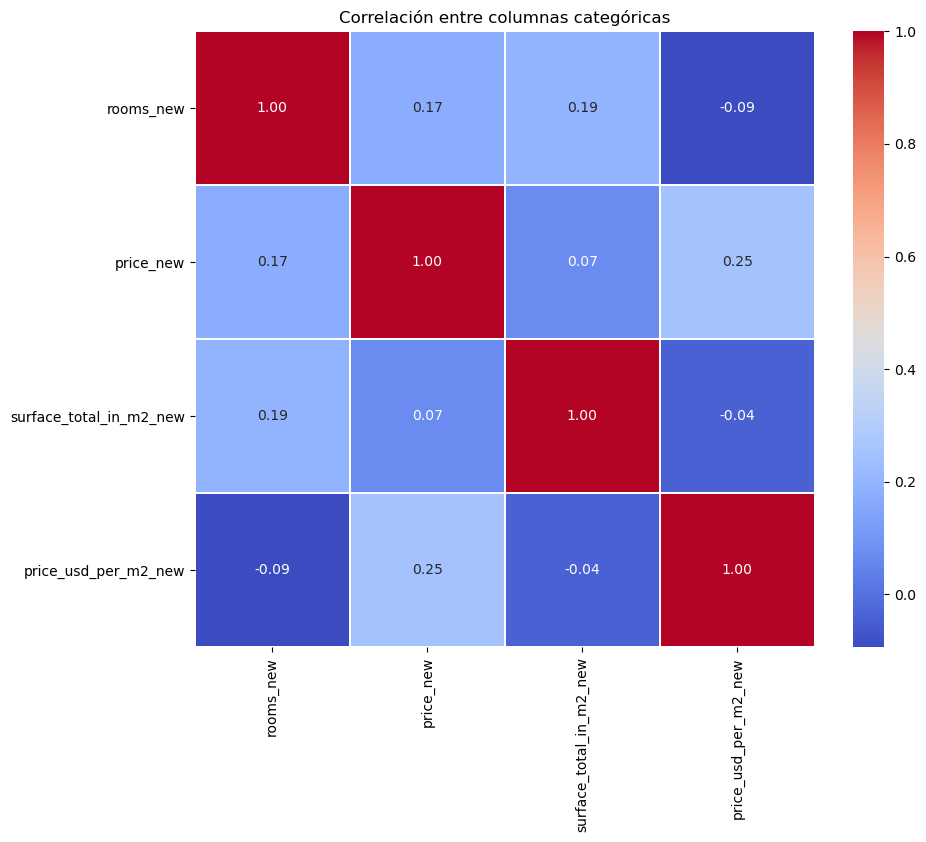

In [185]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlación entre columnas categóricas')
plt.show()

In [186]:
# Se migra el modelo de datos

data_model.to_csv('properatti_model_data')


In [187]:
data_model.columns

Index(['place_name_new', 'state_name_new', 'description_new', 'rooms_new',
       'title_new', 'property_type_new', 'surface_total_in_m2_new',
       'currency_new', 'price_new', 'price_aprox_local_currency_new',
       'price_usd_per_m2_new'],
      dtype='object')

In [188]:
data_model.dtypes

place_name_new                     object
state_name_new                     object
description_new                    object
rooms_new                         float64
title_new                          object
property_type_new                  object
surface_total_in_m2_new           float64
currency_new                       object
price_new                         float64
price_aprox_local_currency_new    float64
price_usd_per_m2_new              float64
dtype: object

In [189]:
#pivot_analisis_model = data.pivot_table('price_usd_per_m2_new' , index = ['state_name_new', 'place_name_new', 'property_type']).sort_values(by=['state_name_new','place_name_new','property_type'	], ascending=False)

pivot_analisis_model = data_model.pivot_table('price_usd_per_m2_new' , index = ['state_name_new'], columns='property_type_new')
pivot_analisis_model

property_type_new,PH,apartment,house,store
state_name_new,,,,
Bs.As. G.B.A. Zona Norte,1405.829753,2808.091465,1307.196582,2136.347633
Bs.As. G.B.A. Zona Oeste,1227.907084,2054.301620,1064.527722,1645.811672
Bs.As. G.B.A. Zona Sur,1200.371609,1805.250167,1031.397724,2457.680678
Buenos Aires Costa Atlántica,1035.919957,1745.593526,672.935131,1177.694940
Buenos Aires Interior,1041.532877,1960.823905,693.650554,1127.729968
Capital Federal,1750.142726,3379.864925,1683.520110,2775.467511
Catamarca,NaN,15221.165000,789.810550,NaN
Chaco,NaN,1946.843030,524.351889,1219.879544
Chubut,1302.351938,1864.658705,1368.358974,2046.679164


In [190]:
# ver de hacer con el resto de outliers, para rooms, surface_total_in_m2
df=data_model

precio_usd=df["price_usd_per_m2_new"]
precio_usd

q1 = precio_usd.quantile(0.25)
print(q1)

q3 = precio_usd.quantile(0.75)
print(q3)

iqr = (q3 - q1) * 1.5

limite_sup = q3 + iqr
limite_inf = q1 - iqr
print(limite_sup)
print(limite_inf)
outlier_mask_up= precio_usd > limite_sup
outlier_mask_down = precio_usd < limite_inf
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)

838.7096774193549
2360.0
4641.935483870968
-1443.225806451613


In [193]:
data_model.columns

Index(['place_name_new', 'state_name_new', 'description_new', 'rooms_new',
       'title_new', 'property_type_new', 'surface_total_in_m2_new',
       'currency_new', 'price_new', 'price_aprox_local_currency_new',
       'price_usd_per_m2_new'],
      dtype='object')

In [194]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'place_name_new', 'geonames_id_new',
       'state_name_new', 'description_new', 'rooms_new', 'title_new',
       'property_type_new', 'floor_null', 'floor_null_property',
       'porc_nulos_x_property', 'floor_new', 'surface_total_in_m2_new',
       'currency_new', 'price_new', 'price_aprox_usd_new',
       'price_aprox_local_currency_new', 'price_usd_per_m2_new',
       'price_per_m2_new'],
      dtype='object')

In [197]:
data.surface_covered_in_m2.isnull().sum()

19904

In [191]:
# modelo
data_model.head(10)

features = []
X = data[]
y = data_model.price_usd_per_m2_new



SyntaxError: invalid syntax (3426393674.py, line 5)

In [199]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'place_name_new', 'geonames_id_new',
       'state_name_new', 'description_new', 'rooms_new', 'title_new',
       'property_type_new', 'floor_null', 'floor_null_property',
       'porc_nulos_x_property', 'floor_new', 'surface_total_in_m2_new',
       'currency_new', 'price_new', 'price_aprox_usd_new',
       'price_aprox_local_currency_new', 'price_usd_per_m2_new',
       'price_per_m2_new'],
      dtype='object')

In [206]:
data['surface_covered_in_m2_new'] = data['surface_covered_in_m2']

In [209]:
# Crear un nuevo DataFrame para almacenar los valores sin outliers
df_no_outliers_surface = pd.DataFrame()

# Iterar sobre cada tipo de propiedad
for property_type, group in data.groupby('property_type_new'):
    # Calcular los límites para detectar outliers en surface_covered_in_m2
    q1_covered = group['surface_covered_in_m2_new'].quantile(0.25)
    q3_covered = group['surface_covered_in_m2_new'].quantile(0.75)
    iqr_covered = q3_covered - q1_covered
    lower_bound_covered = q1_covered - 1.5 * iqr_covered
    upper_bound_covered = q3_covered + 1.5 * iqr_covered

    # Calcular los límites para detectar outliers en surface_total_in_m2
    q1_total = group['surface_total_in_m2_new'].quantile(0.25)
    q3_total = group['surface_total_in_m2_new'].quantile(0.75)
    iqr_total = q3_total - q1_total
    lower_bound_total = q1_total - 1.5 * iqr_total
    upper_bound_total = q3_total + 1.5 * iqr_total

    # Filtrar los datos dentro de los límites para surface_covered_in_m2 y surface_total_in_m2
    filtered_data_covered = group[(group['surface_covered_in_m2_new'] >= lower_bound_covered) & (group['surface_covered_in_m2_new'] <= upper_bound_covered)]
    filtered_data_total = group[(group['surface_total_in_m2_new'] >= lower_bound_total) & (group['surface_total_in_m2_new'] <= upper_bound_total)]

    # Agregar los datos filtrados al nuevo DataFrame
    df_no_outliers_surface = pd.concat([df_no_outliers_surface, filtered_data_covered, filtered_data_total])

# En versiones anteriores este código nos generaba valores duplicados, así que procedemos a dropearlos
df_no_outliers_surface= df_no_outliers_surface.drop_duplicates()

# Reemplazar el DataFrame original con el DataFrame limpio
data = df_no_outliers_surface


In [211]:
data.surface_covered_in_m2.isnull().sum()

18990

In [210]:
data.surface_covered_in_m2_new.isnull().sum()

18990

In [215]:
# Calculamos las diferencias por tipo de propiedad
data['difference_by_property'] = data.groupby('property_type_new')['surface_total_in_m2_new'].transform('mean') - data.groupby('property_type_new')['surface_covered_in_m2_new'].transform('mean')

# Imputamos los valores faltantes en 'surface_covered_in_m2' usando la diferencia por propiedad
data['surface_covered_in_m2_new'].fillna(data['surface_total_in_m2_new'] - data['difference_by_property'], inplace=True)

# Imputamos los valores faltantes en 'surface_total_in_m2' usando la diferencia por propiedad
data['surface_total_in_m2'].fillna(data['surface_covered_in_m2'] + data['difference_by_property'], inplace=True)

# Elimina la columna intermedia utilizada para la imputación
data.drop('difference_by_property', axis=1, inplace=True)

# Ahora, 'surface_covered_in_m2' y 'surface_total_in_m2' contienen los valores imputados considerando la diferencia por tipo de propiedad

In [216]:
data.surface_covered_in_m2.isnull().sum()

18990

In [217]:
data.surface_covered_in_m2_new.isnull().sum()

0

In [218]:
data.surface_total_in_m2.isnull().sum()

11873

In [219]:
data.surface_total_in_m2_new.isnull().sum()

91

In [220]:
data.isnull().sum()

Unnamed: 0                             0
operation                              0
property_type                          0
place_name                            23
place_with_parent_names                0
country_name                           0
state_name                             0
geonames_id                        18133
lat-lon                            50129
lat                                50129
lon                                50129
price                              19506
currency                           19507
price_aprox_local_currency         19506
price_aprox_usd                    19506
surface_total_in_m2                11873
surface_covered_in_m2              18990
price_usd_per_m2                   51257
price_per_m2                       32166
floor                             109145
rooms                              71754
expenses                          103342
properati_url                          0
description                            2
title           